In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/DS_Python_Assignment.xlsx"  # Replace with your actual file name
data = pd.read_excel(file_path)

# Display basic information
print("Dataset loaded successfully!")
data.info()


Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, CUSTOMERID to MDAYSHOPPER_L4Y
dtypes: float64(49), int64(65), object(3)
memory usage: 8.9+ MB


**List Down all the columns with missing values** **bold text**

In [2]:
# List columns with missing values
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
STATE                                                   59
TENURE_IN_MONTHS                                        66
CLOSESTSTOREDISTANCE                                  1545
AGE                                                   5945
INCOME                                                3259
LENGTH OF RESIDENCE                                   2872
NUMBER OF PERSONS IN LIVING UNIT                      2872
NUMBER OF ADULTS IN LIVING UNIT                       2872
MOSAIC                                                1868
CAPE: AGE: POP: MEDIAN AGE                            2872
CAPE: AGE: POP: % 0-17                                2872
CAPE: AGE: POP: % 18-99+                              2872
CAPE: AGE: POP: % 65-99+                              2872
CAPE: ETHNIC: POP: % WHITE ONLY                       2872
CAPE: ETHNIC: POP: % BLACK ONLY                       2872
CAPE: ETHNIC: POP: % ASIAN ONLY                       2872
CAPE: ETHNIC: POP: % HISPAN

**Categorize columns based on their data types**

In [3]:
# Categorize columns by data type
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'INCOME', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'METRO', 'URBAN', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDISE BUYER', 'MOR BANK: FAMILY AND GENERAL MAGAZINE', 'MOR BANK: FEMALE ORIENTED MAGAZINE', 'MOR BANK: MALE SPORTS MAGAZINE', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: GARDENING-FARMING MAGAZINE', 'MOR BANK: CULINARY INTERE

**List the columns with duplicate a)Remove them b)Print before and after**

In [5]:
# Check and remove duplicate columns
print("Dataset Before Removing Duplicate Columns:")
print(data.head())



# Identify duplicate columns
duplicate_columns = data.columns[data.columns.duplicated()].tolist()
print("\nDuplicate Columns Identified:")
print(duplicate_columns)

# Remove duplicate columns
data_cleaned = data.loc[:, ~data.columns.duplicated()]

# Display the dataset after removing duplicates
print("\nDataset After Removing Duplicate Columns:")
print(data_cleaned.head())



Dataset Before Removing Duplicate Columns:
   CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0        5001    TX         1                      N              -9.0   
1        5002    OH         0                      Y               9.0   
2        5003    TX         0                      N              12.0   
3        5004    TN         0                      N              -1.0   
4        5005    TX         0                      N              16.0   

   CLOSESTSTOREDISTANCE  FEMALE  AGE  HS_DIPLOMA  SOME_COLLEGE  ...  \
0                   NaN       0  NaN           0             0  ...   
1              8.728943       0  NaN           0             0  ...   
2                   NaN       0  NaN           0             0  ...   
3                   NaN       0  NaN           0             0  ...   
4                   NaN       0  NaN           0             0  ...   

   MDAYREV_L3Y  MDAYREV_L4Y  MDAYQTY_L1Y  MDAYQTY_L2Y  MDAYQTY_L3Y  \
0          0.0 

**List the constants columns  a)Remove them b)Print before and after**

In [6]:
# Check and remove constants columns
print("Dataset Before Removing constant Columns:")
print(data_cleaned.head())

# Identify constant columns
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print("Constant Columns:", constant_columns)

# Drop constant columns
data.drop(columns=constant_columns, inplace=True)

# Display the dataset after removing constant columns
print("\nDataset After Removing constants Columns:")
print(data_cleaned.head())


Dataset Before Removing constant Columns:
   CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0        5001    TX         1                      N              -9.0   
1        5002    OH         0                      Y               9.0   
2        5003    TX         0                      N              12.0   
3        5004    TN         0                      N              -1.0   
4        5005    TX         0                      N              16.0   

   CLOSESTSTOREDISTANCE  FEMALE  AGE  HS_DIPLOMA  SOME_COLLEGE  ...  \
0                   NaN       0  NaN           0             0  ...   
1              8.728943       0  NaN           0             0  ...   
2                   NaN       0  NaN           0             0  ...   
3                   NaN       0  NaN           0             0  ...   
4                   NaN       0  NaN           0             0  ...   

   MDAYREV_L3Y  MDAYREV_L4Y  MDAYQTY_L1Y  MDAYQTY_L2Y  MDAYQTY_L3Y  \
0          0.0  

**boxplots for numeric columns**

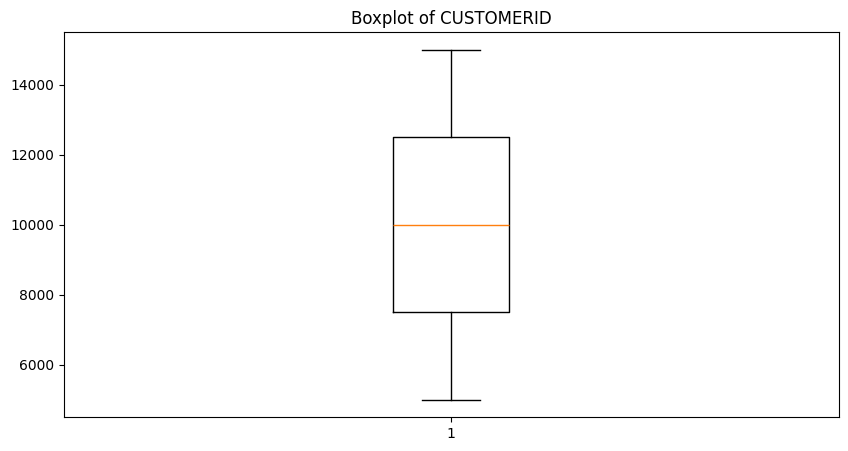

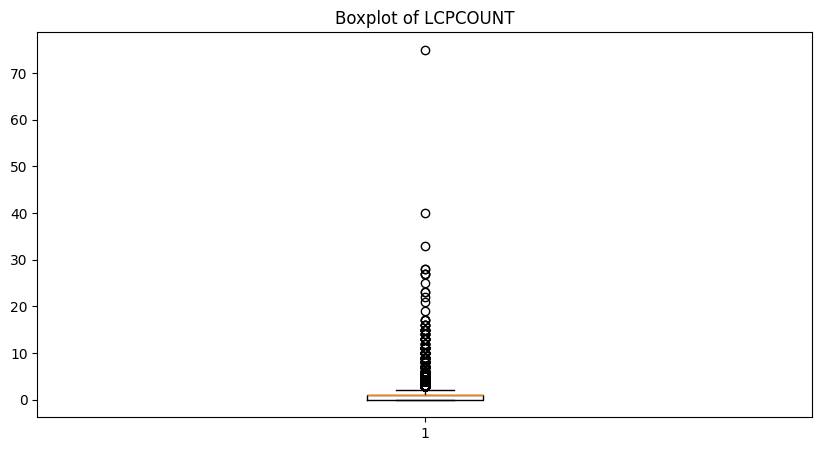

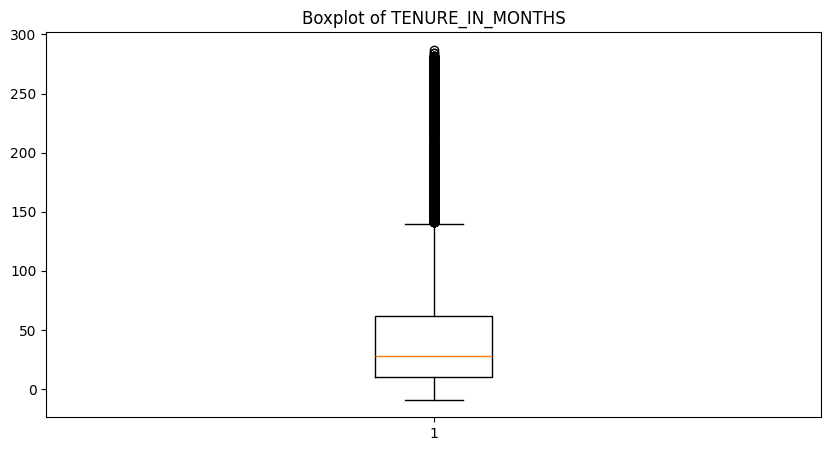

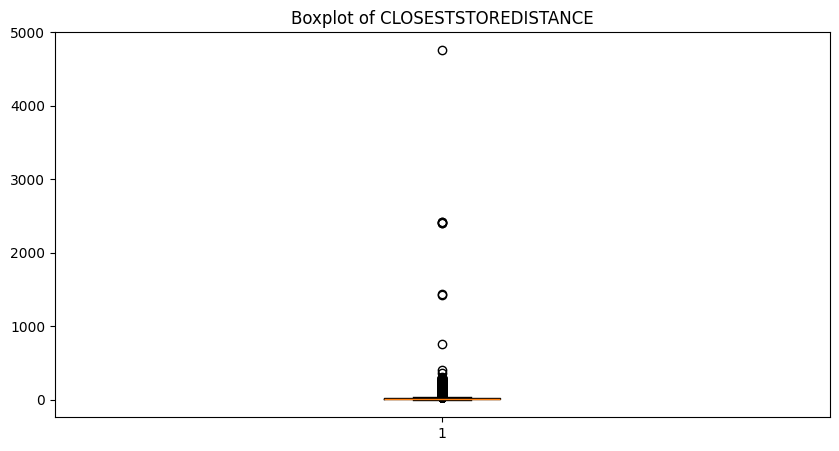

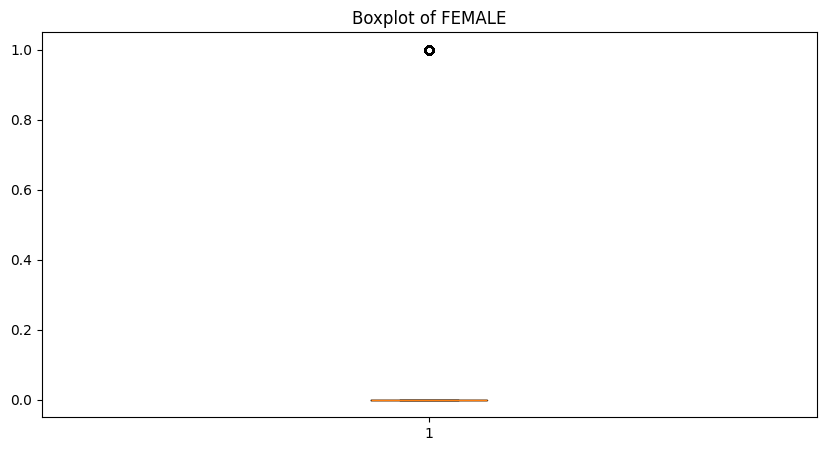

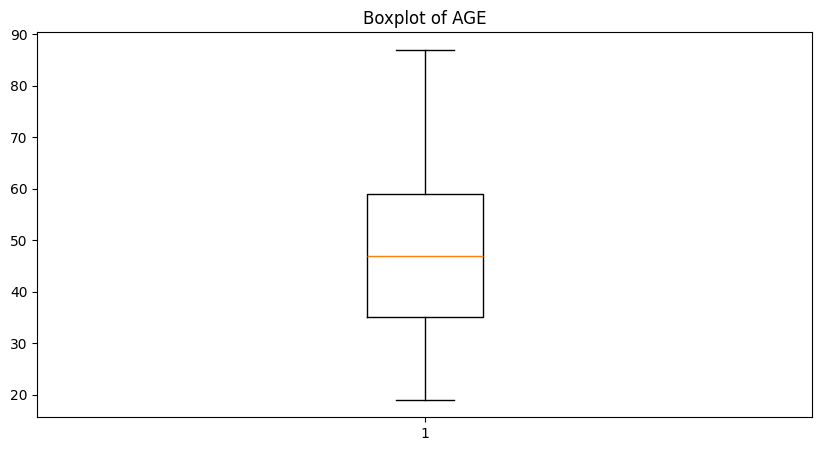

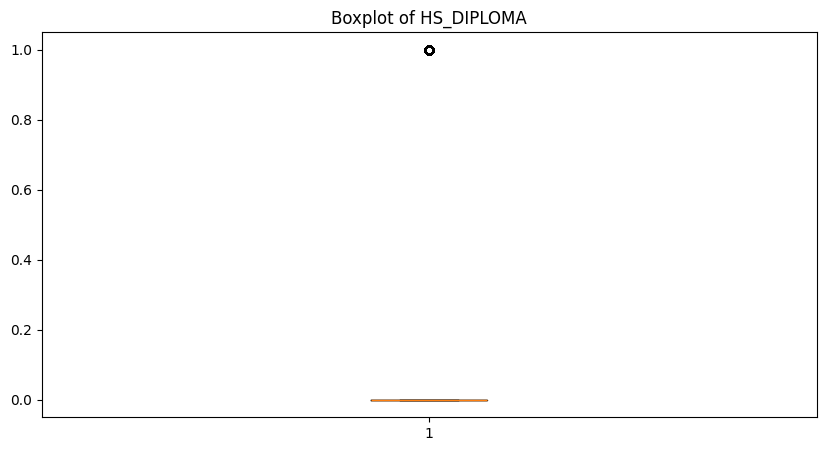

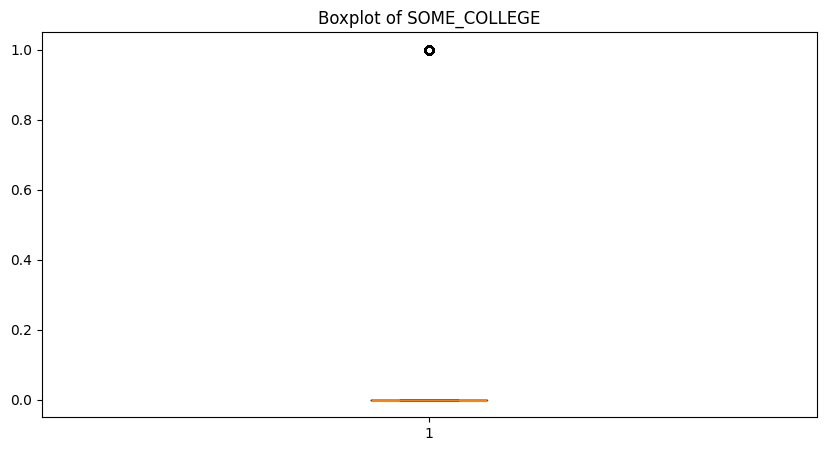

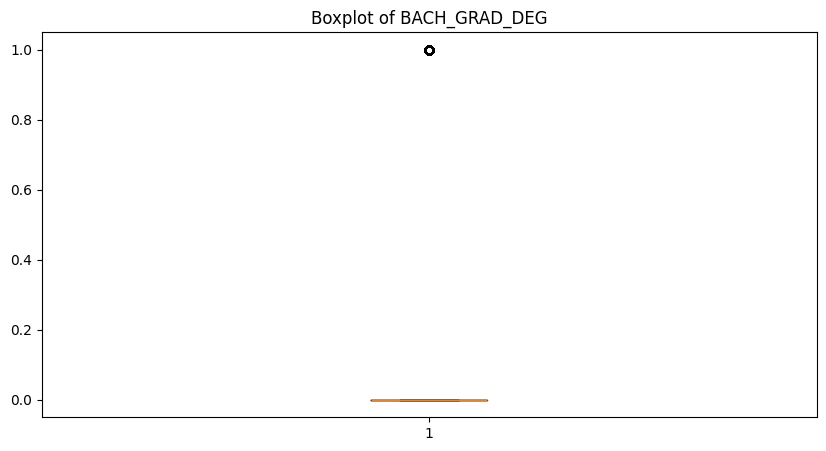

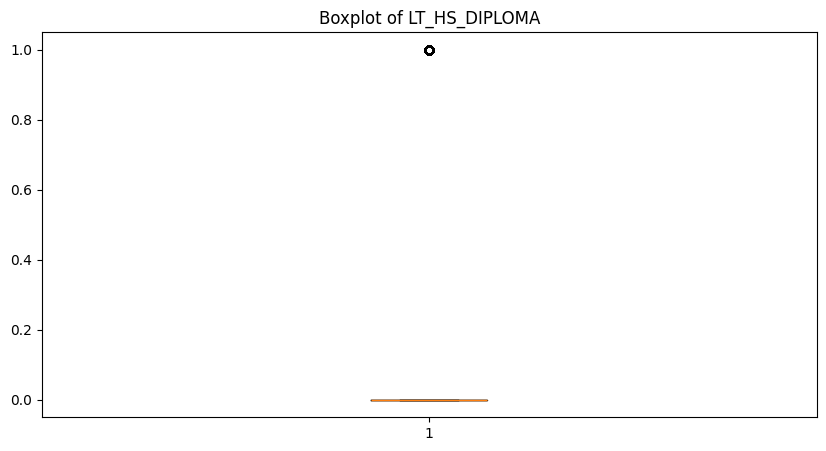

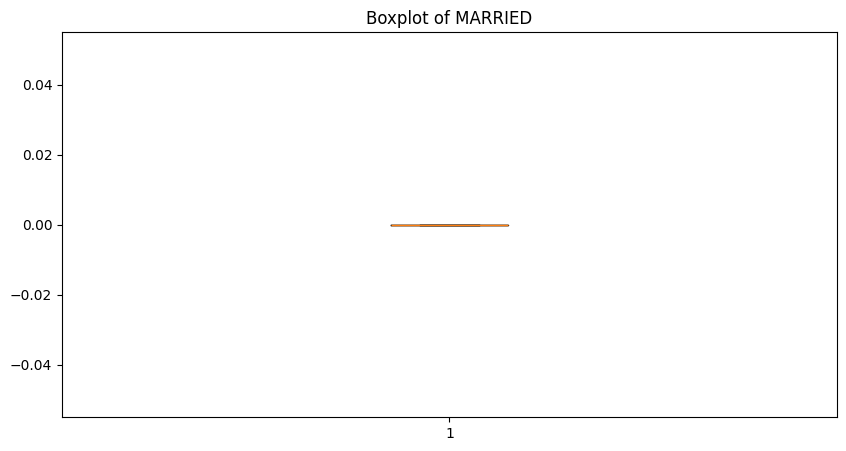

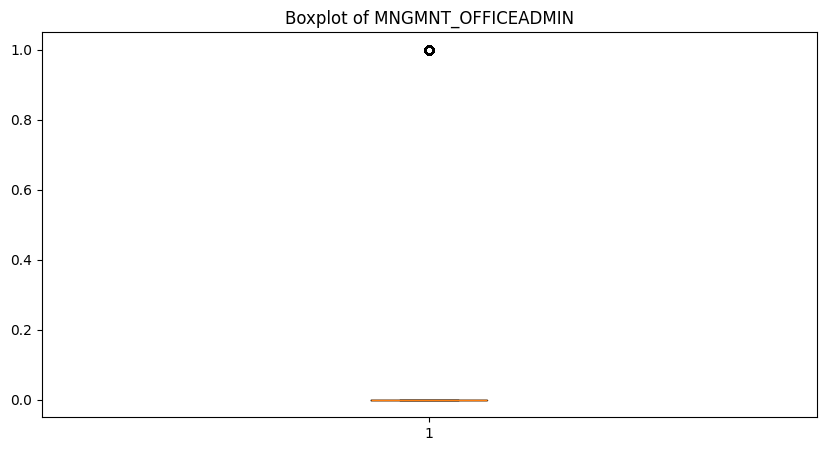

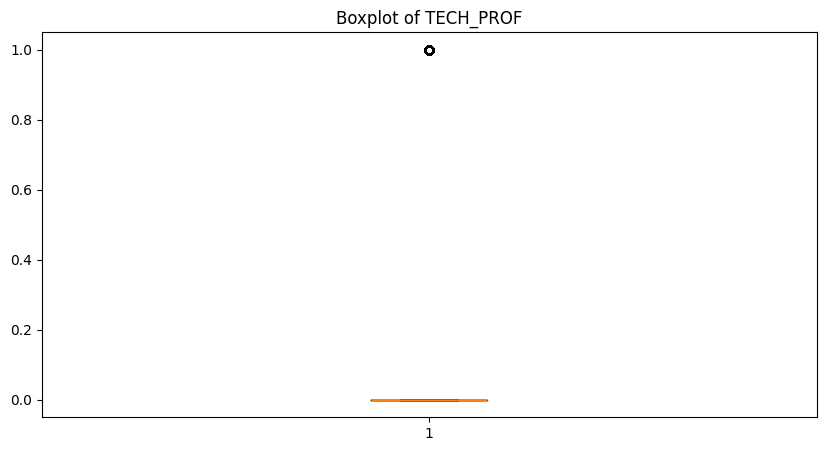

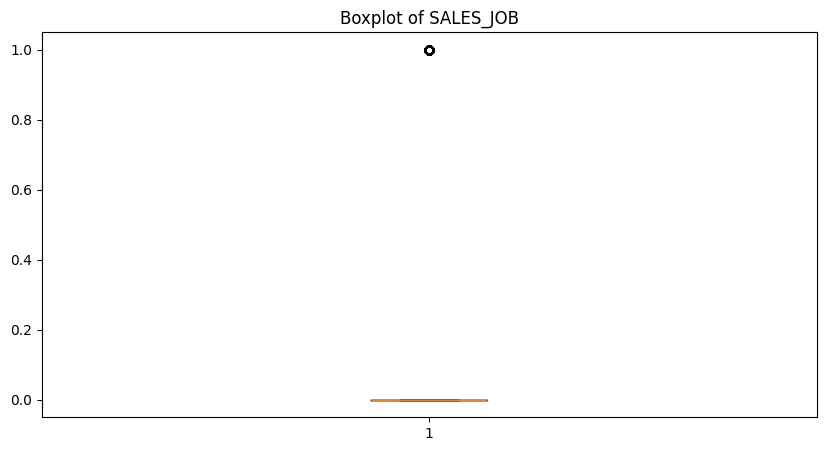

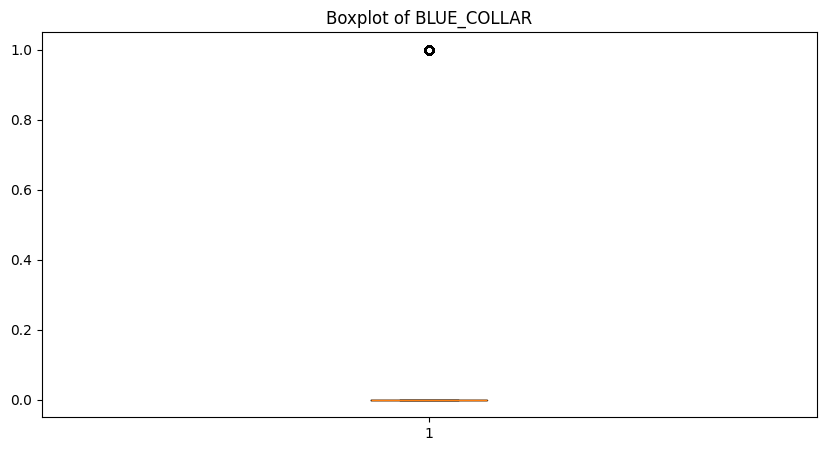

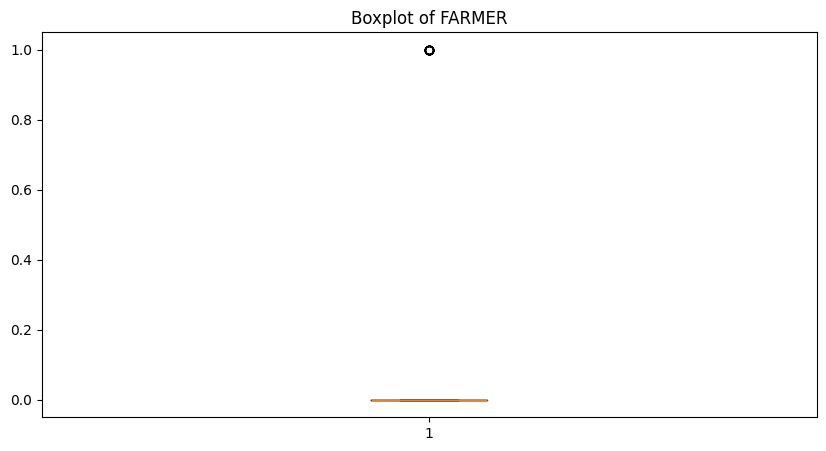

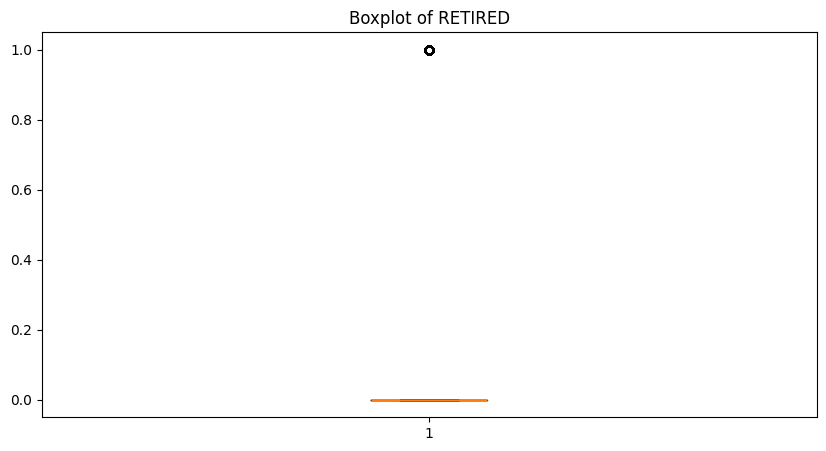

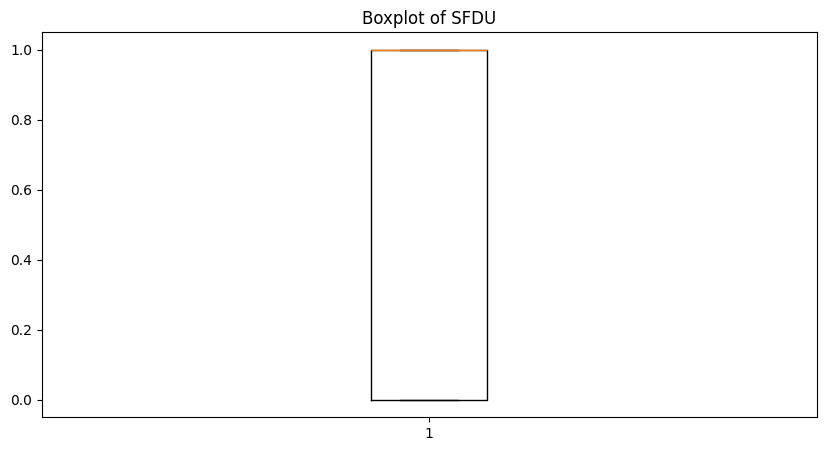

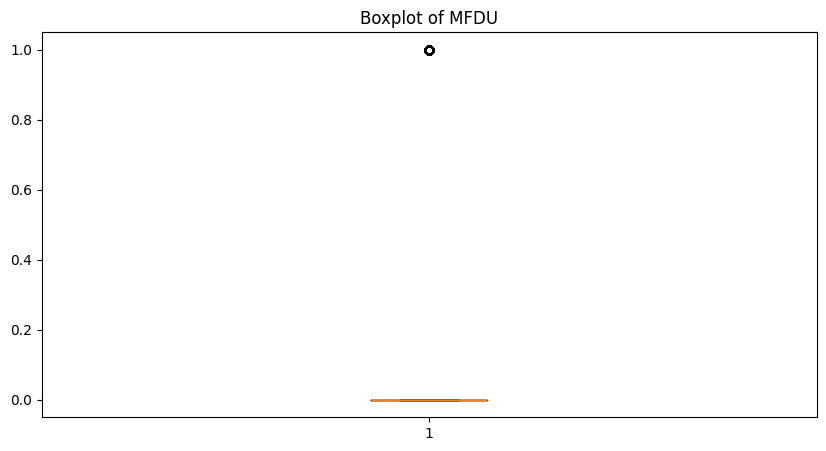

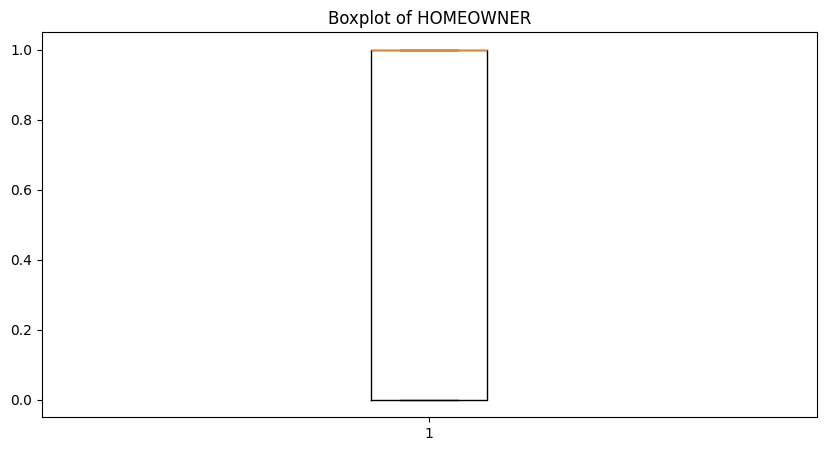

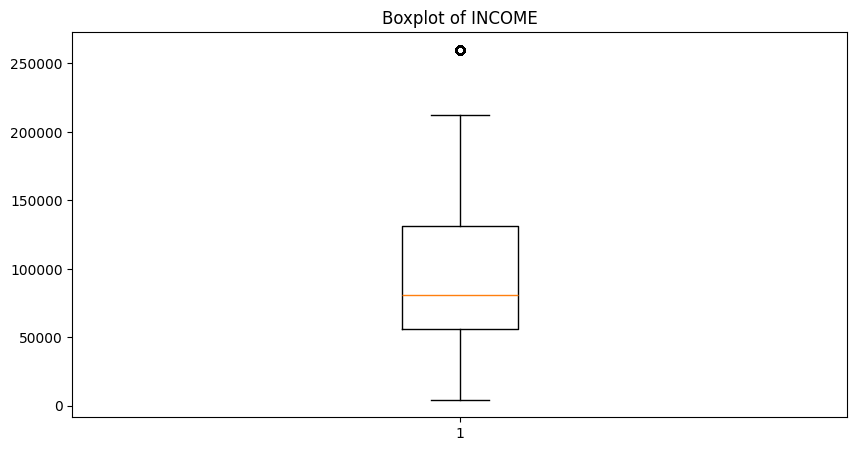

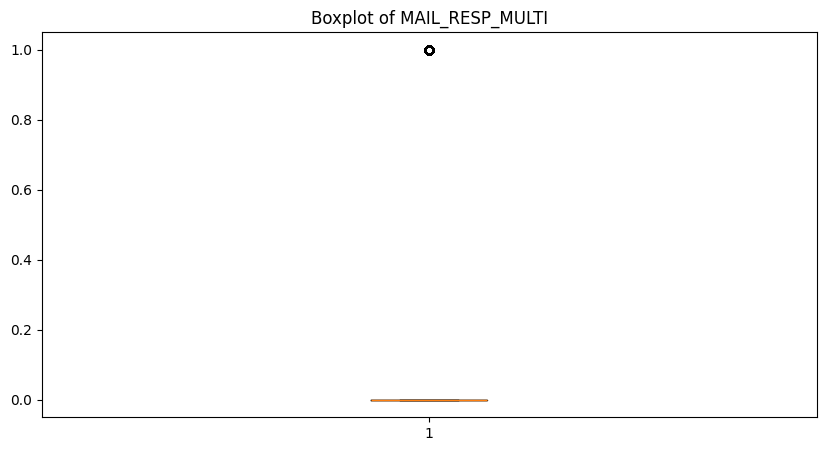

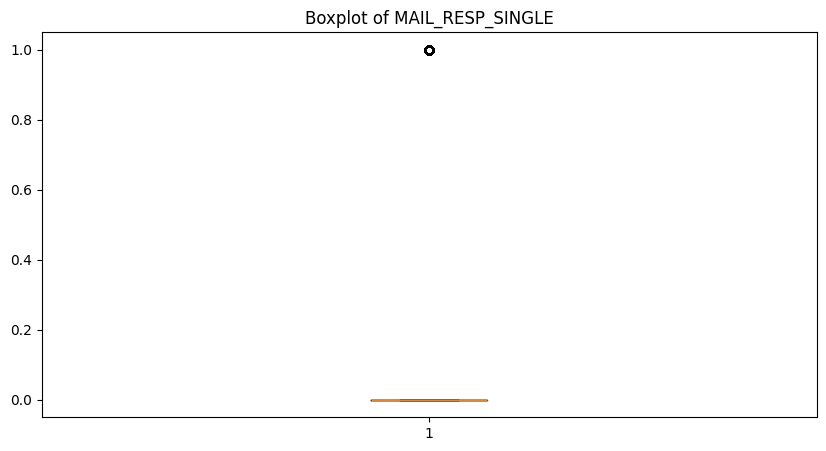

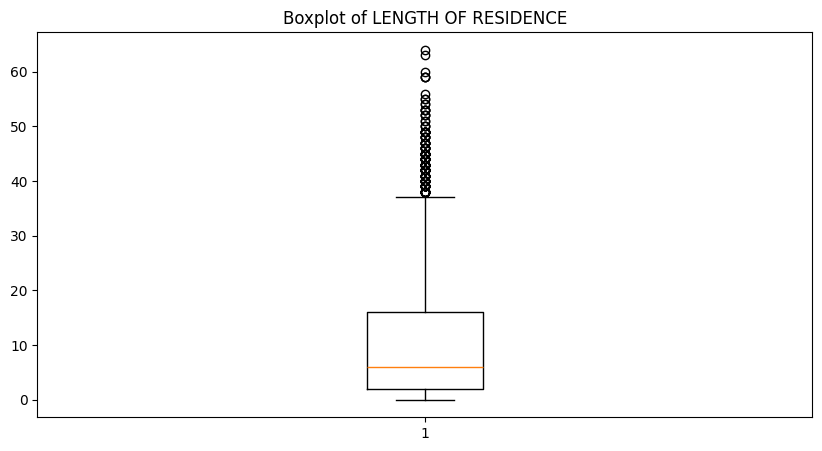

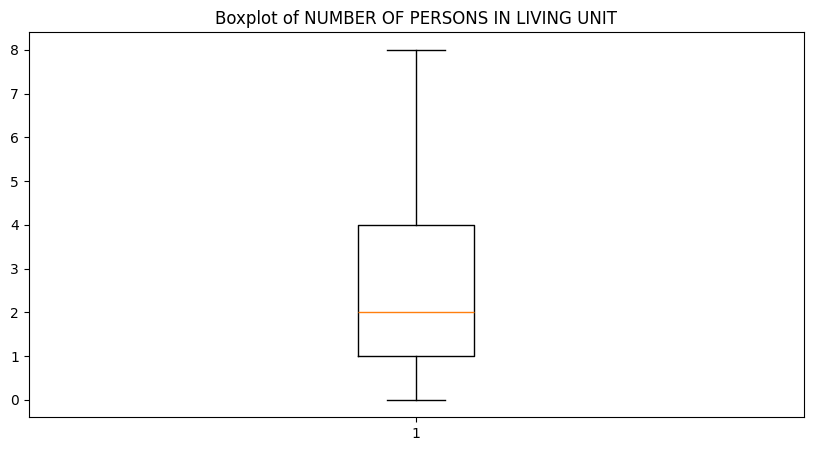

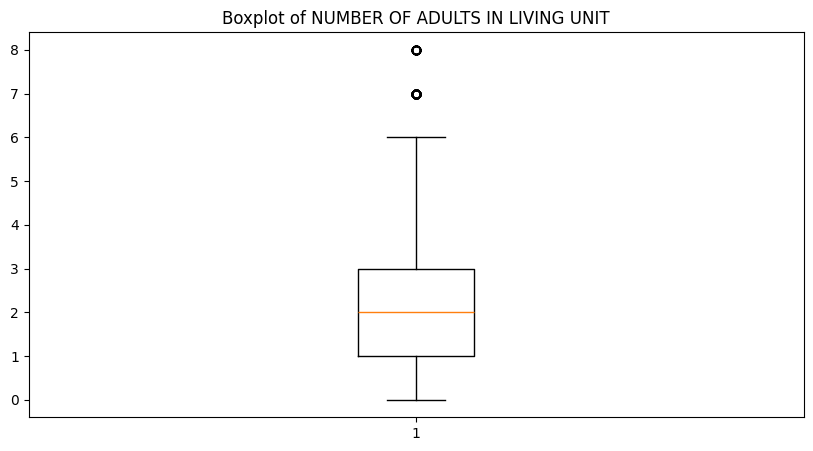

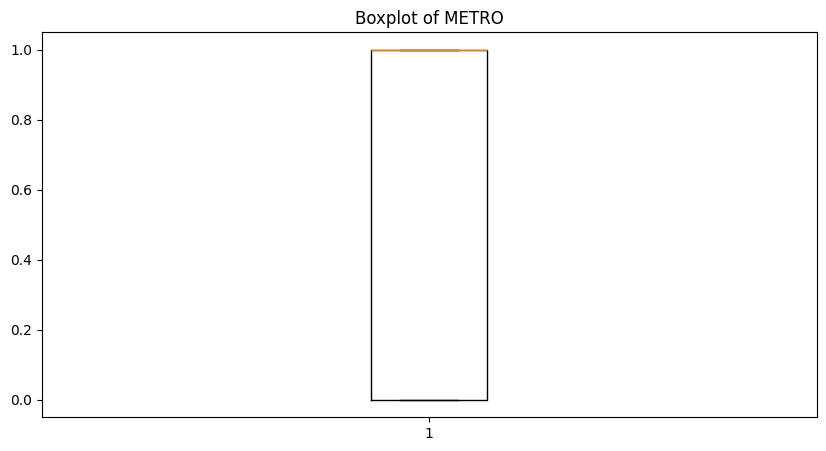

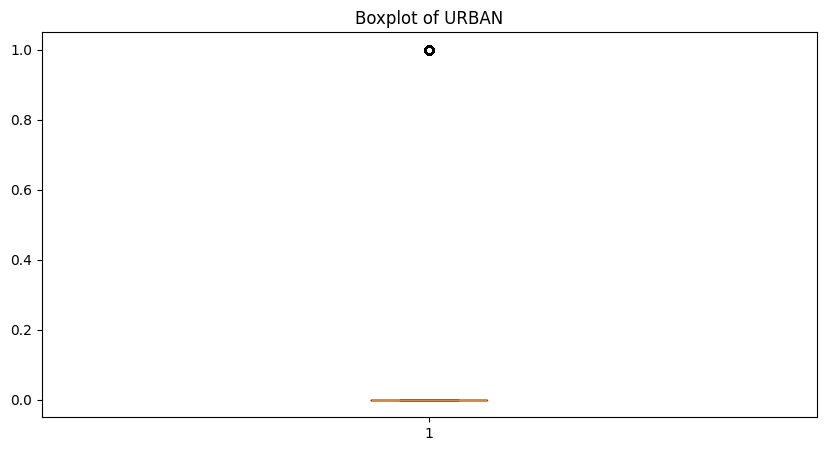

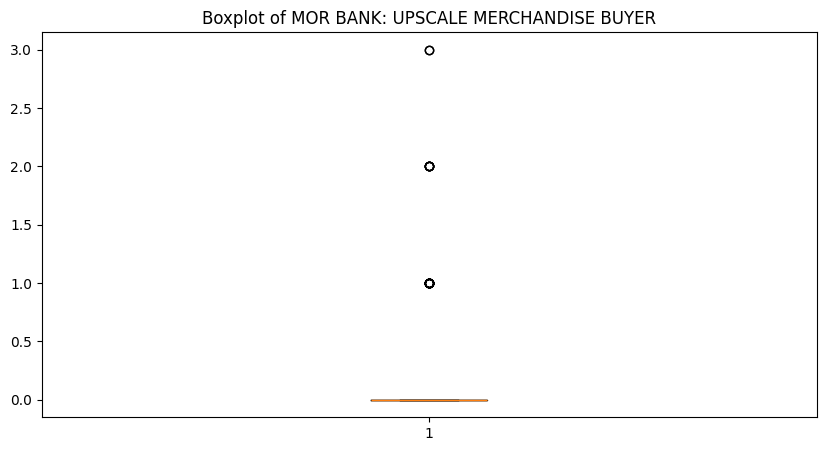

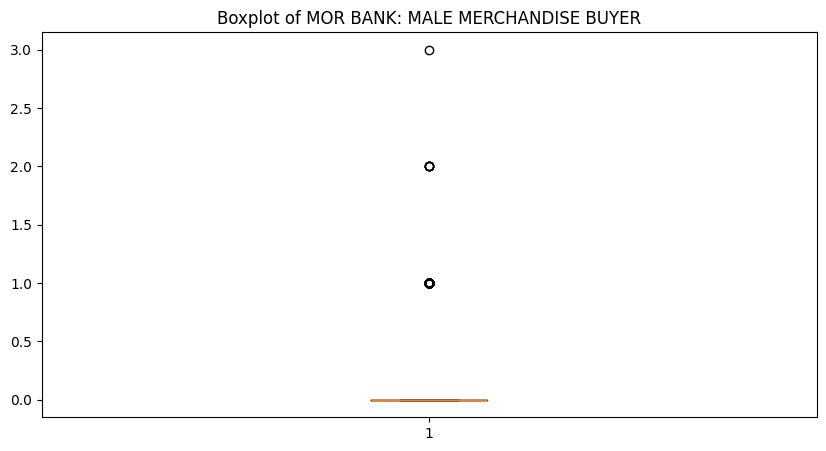

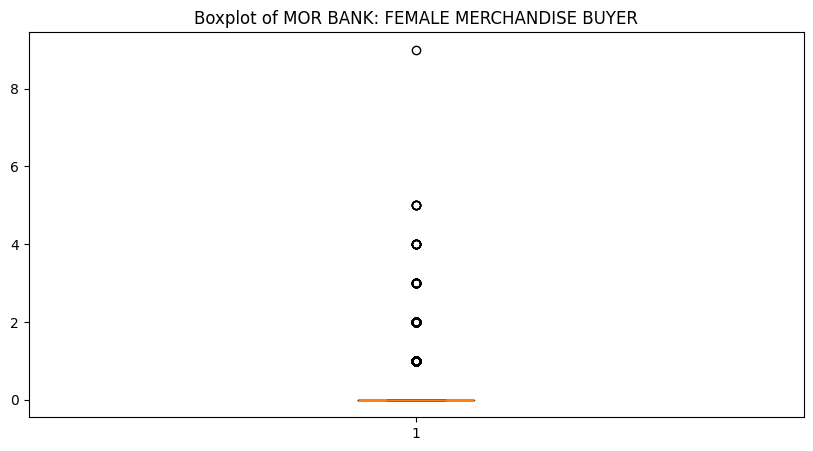

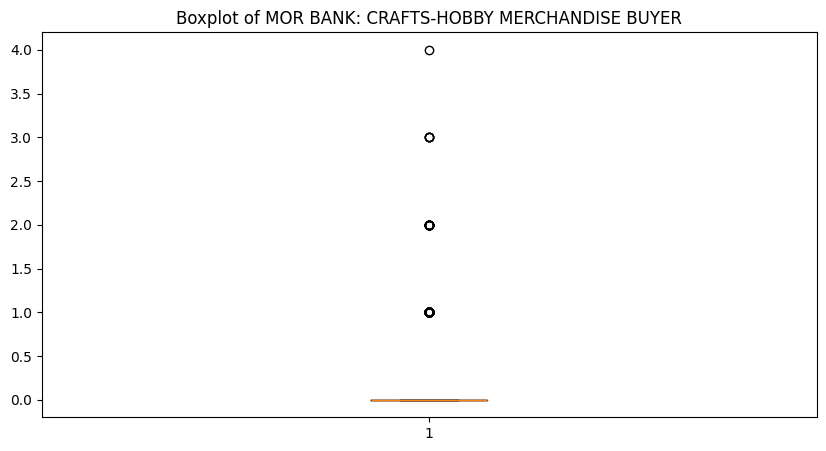

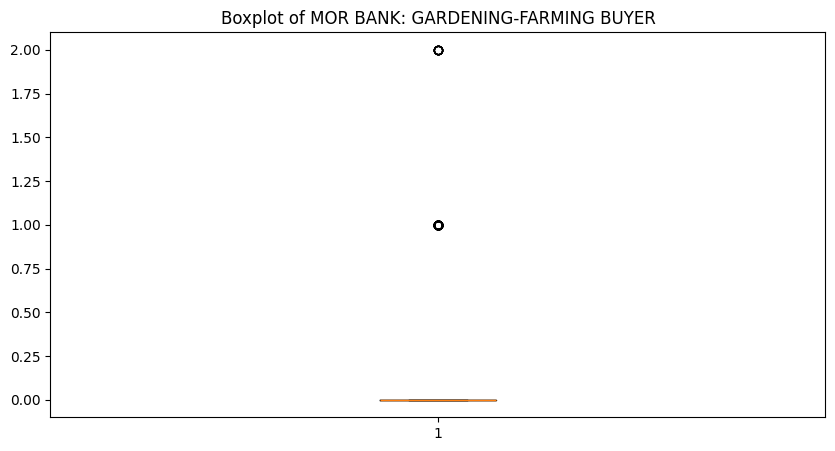

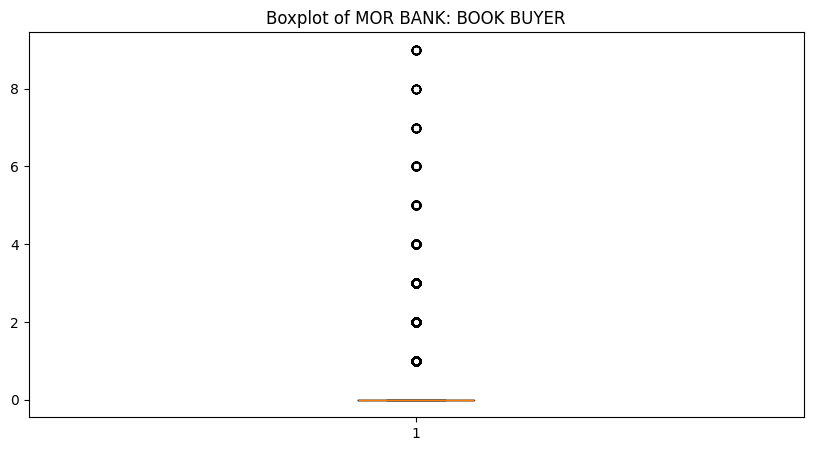

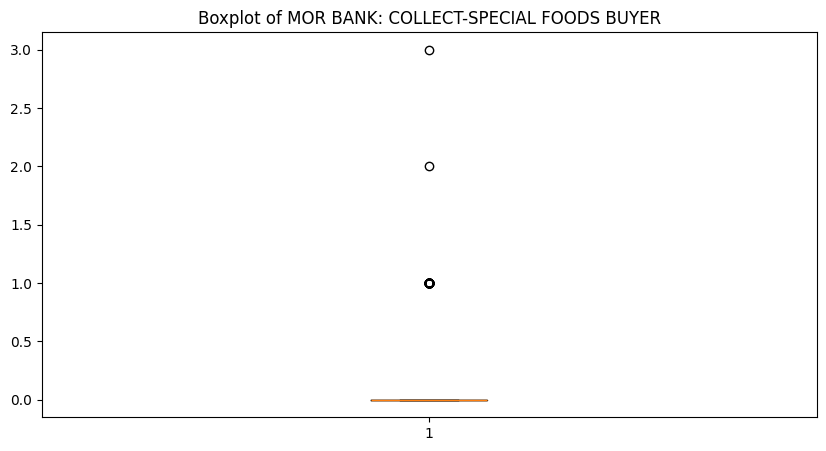

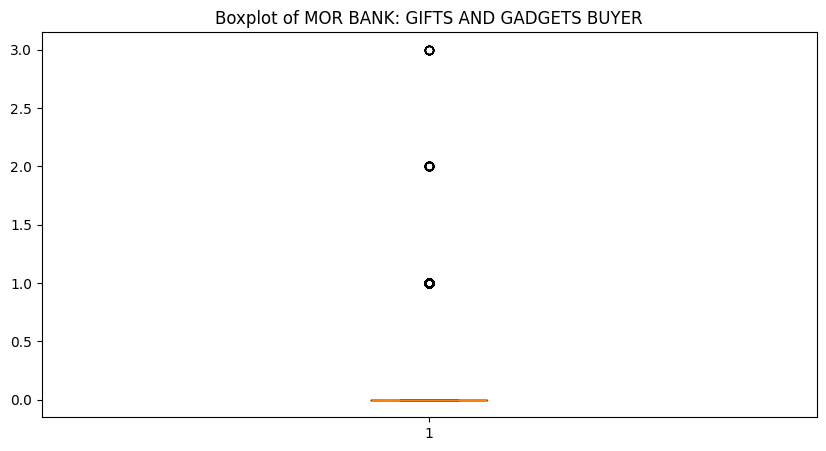

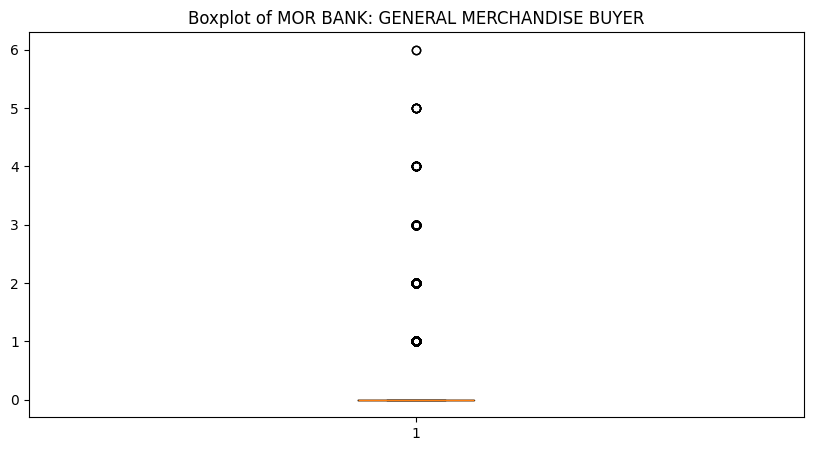

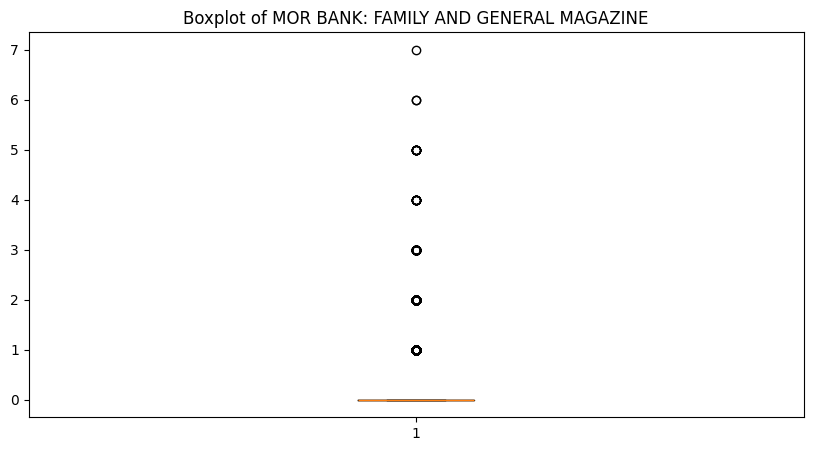

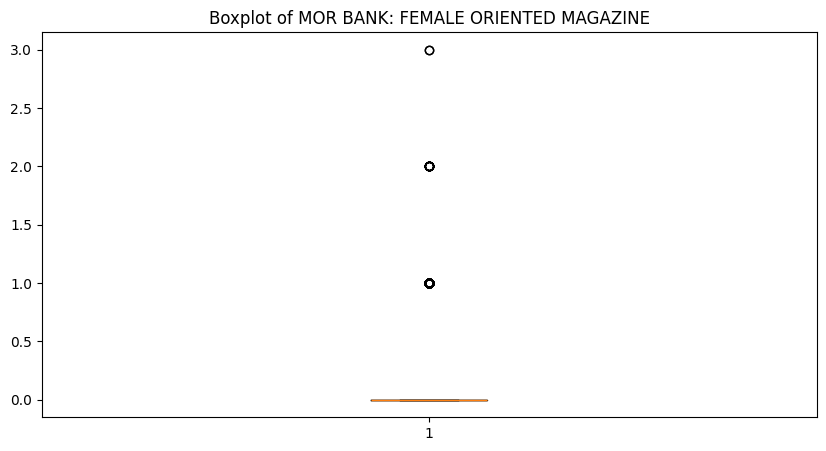

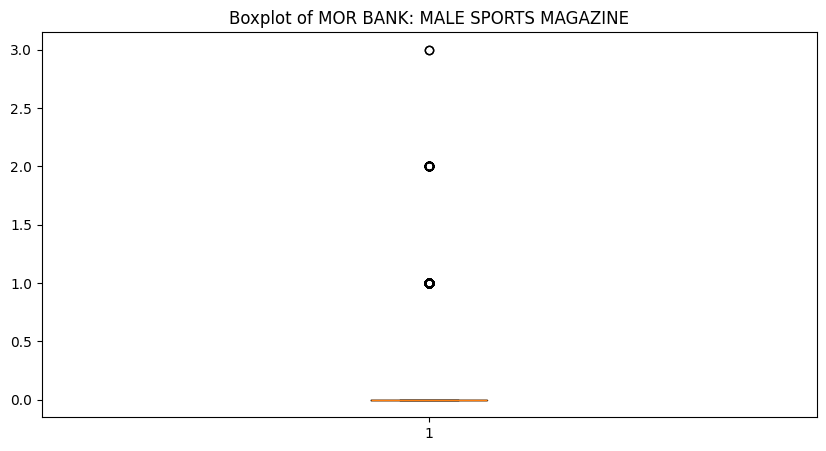

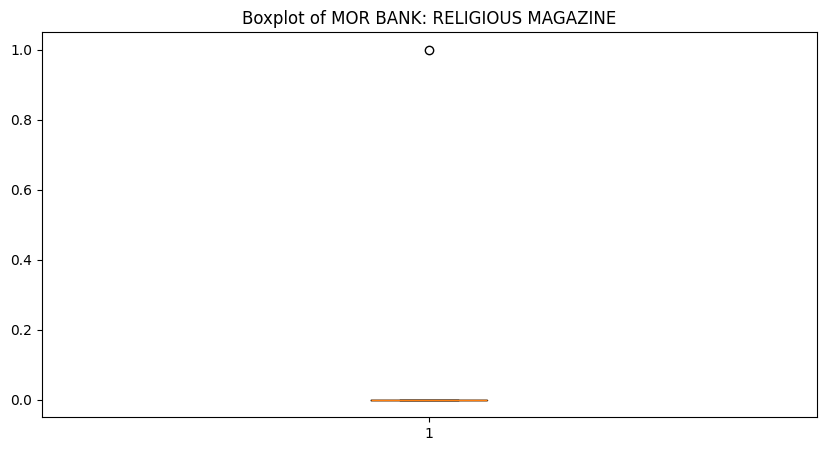

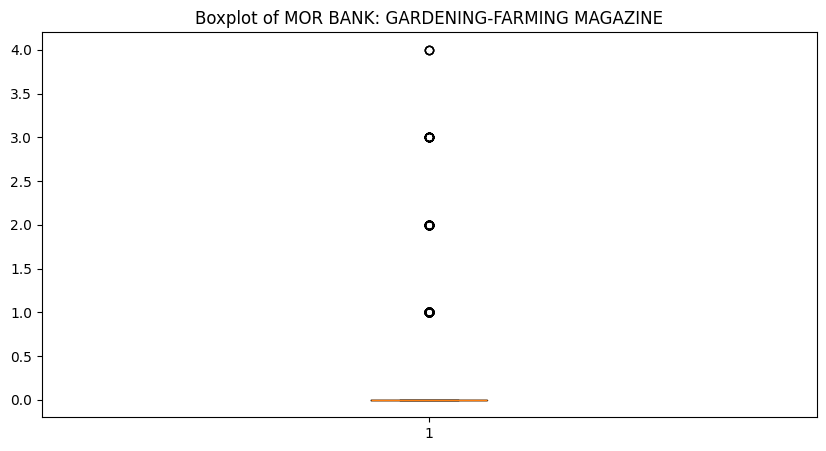

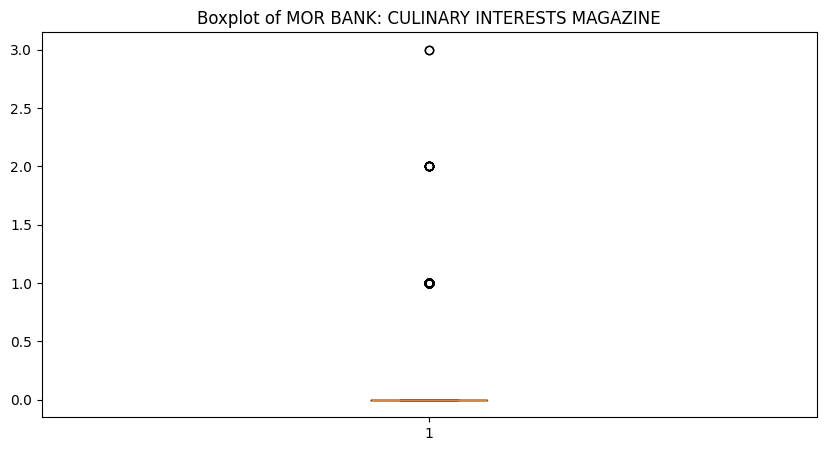

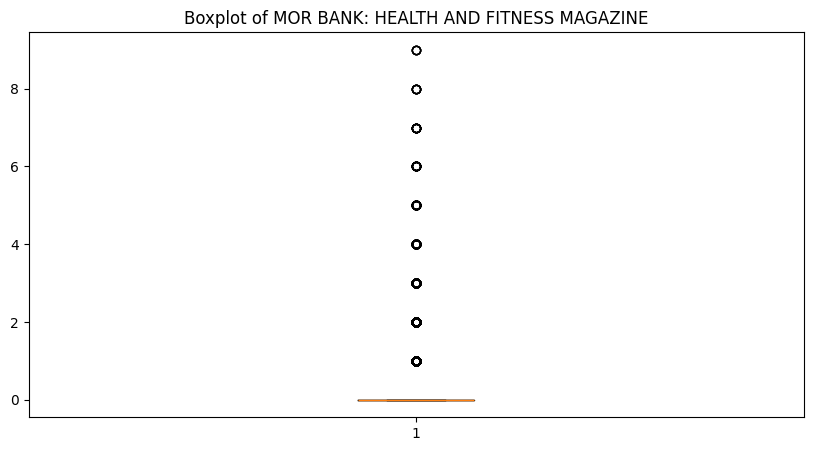

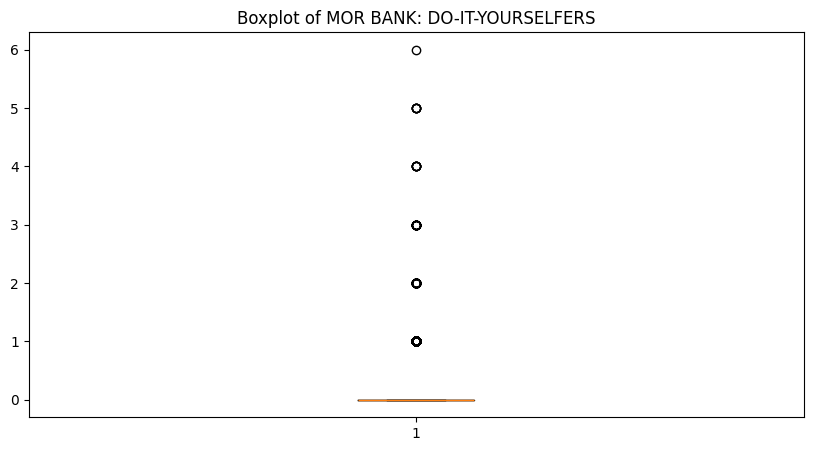

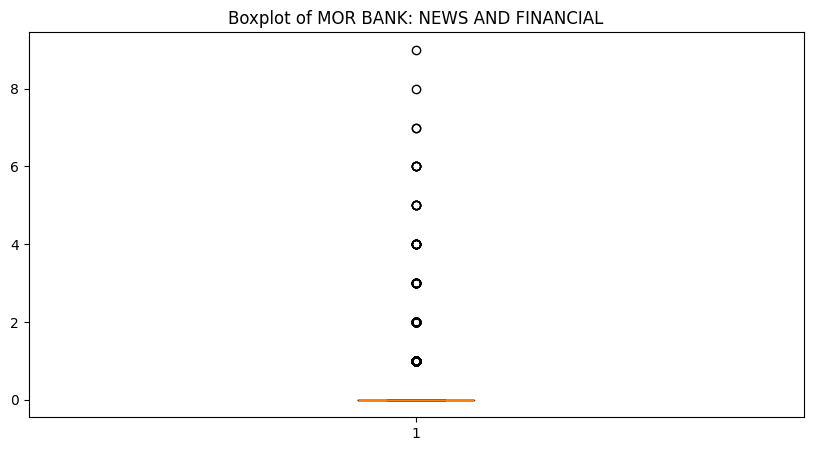

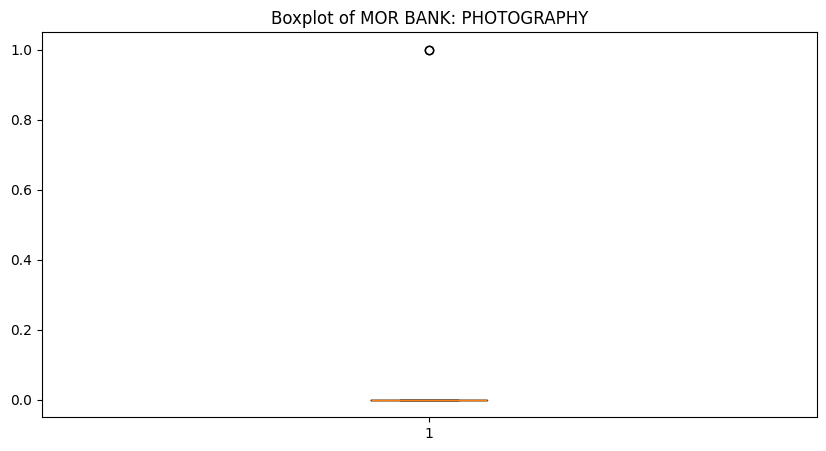

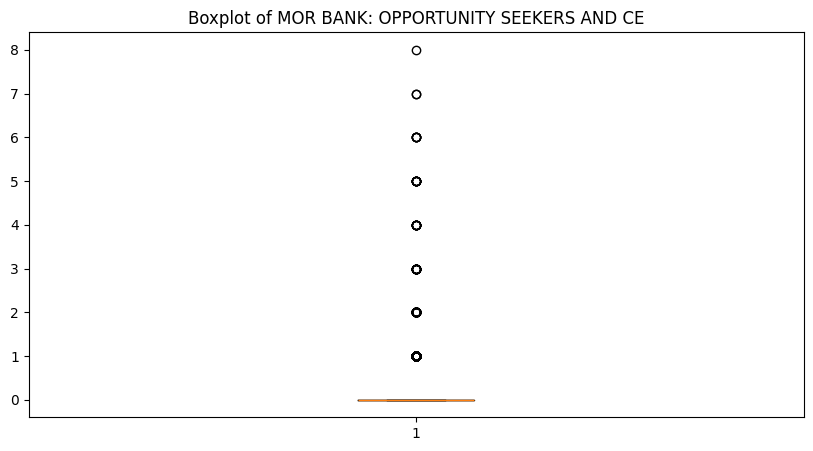

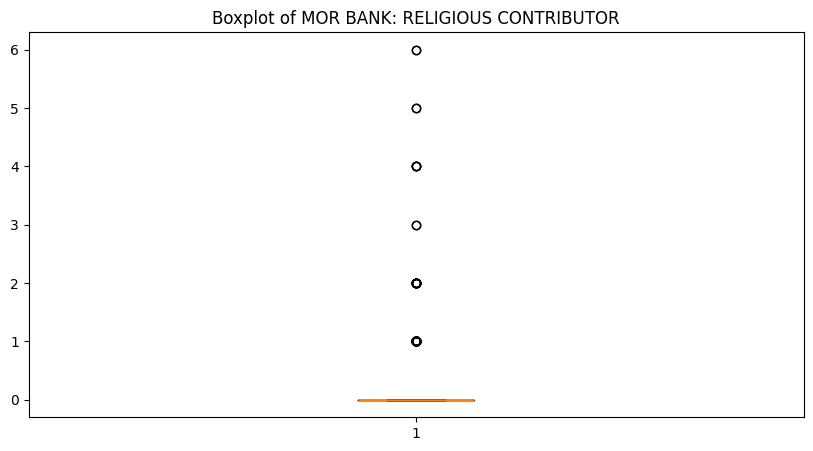

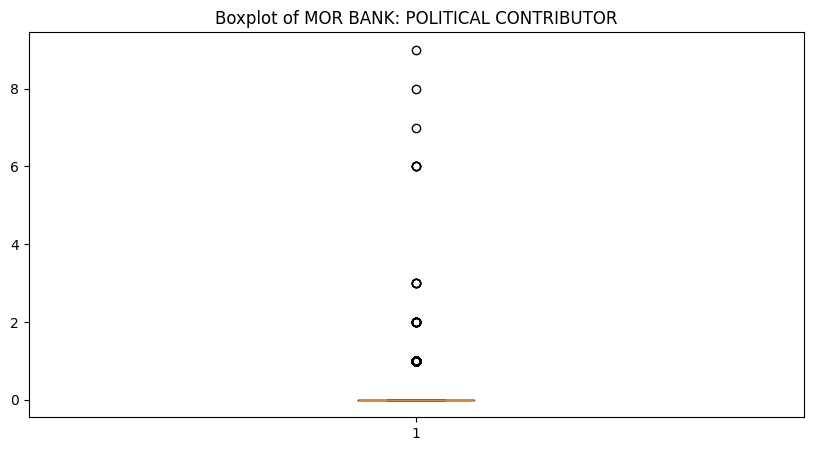

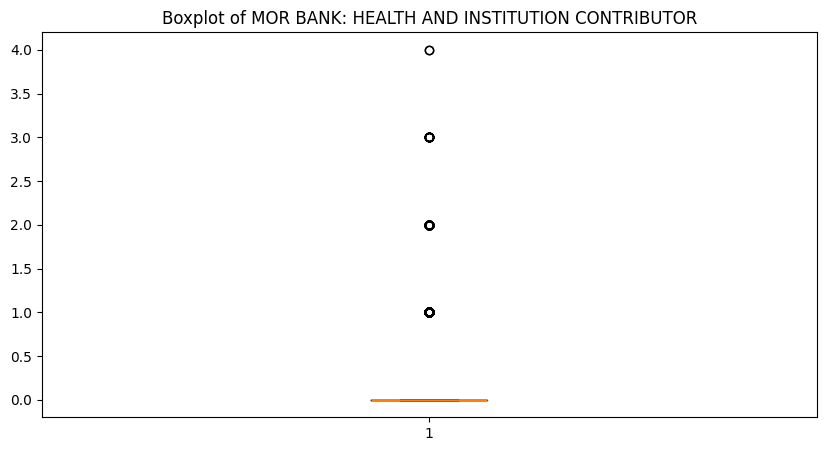

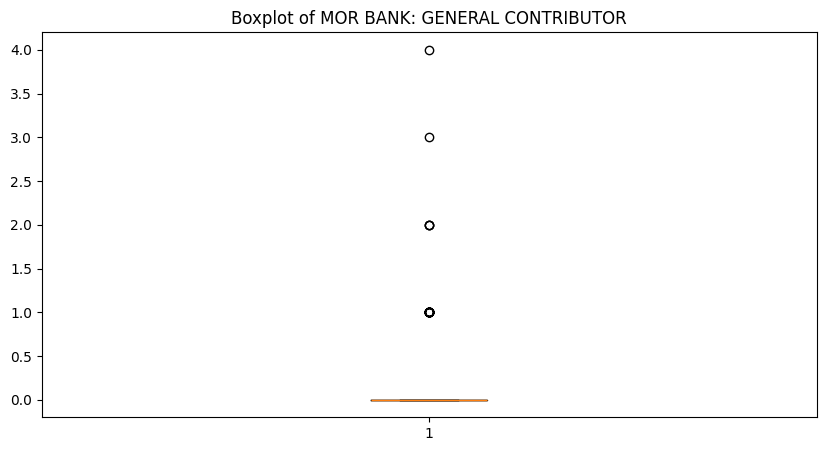

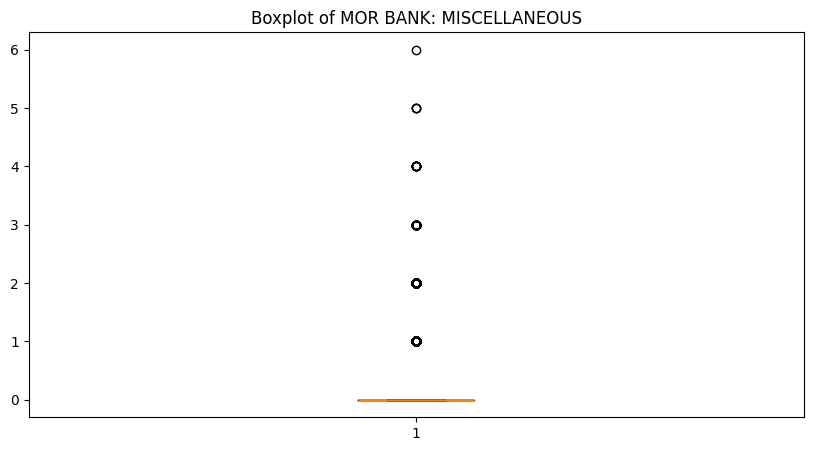

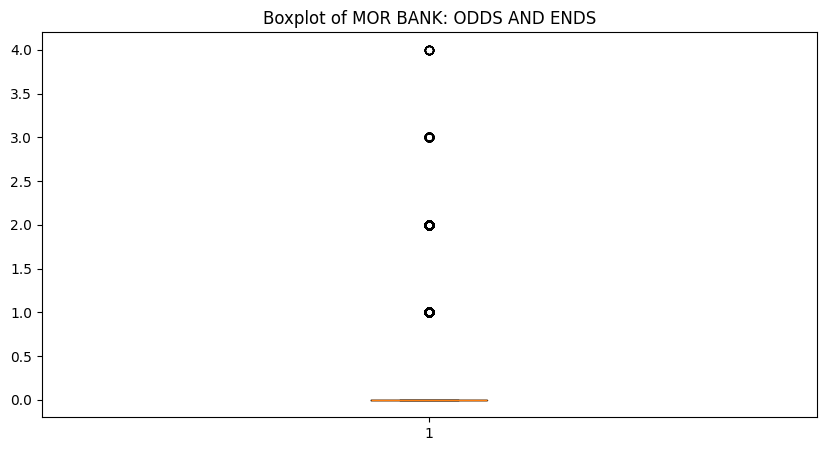

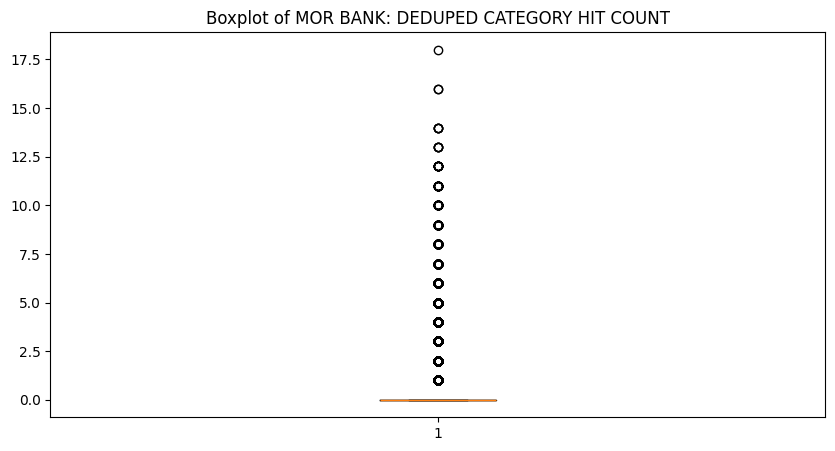

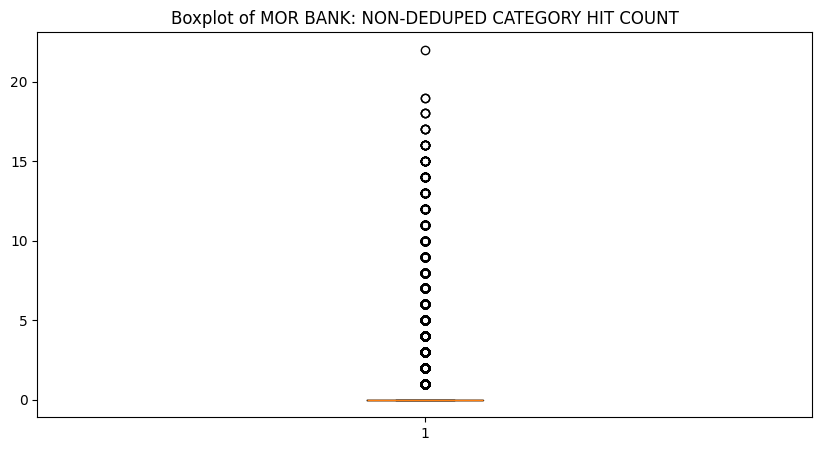

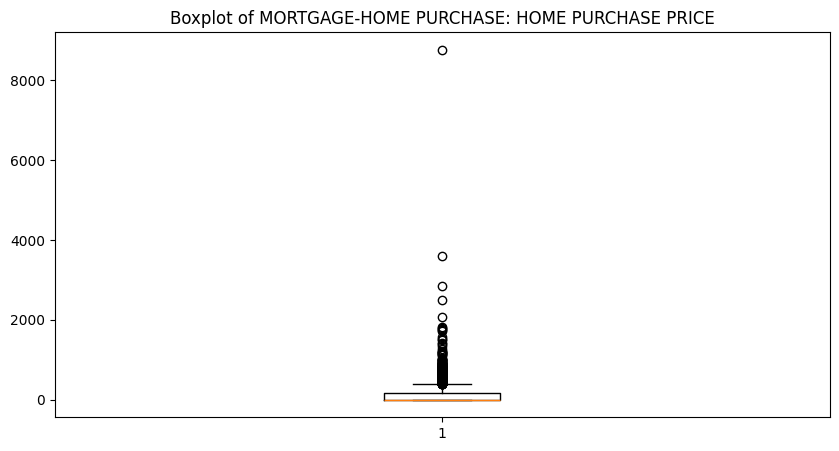

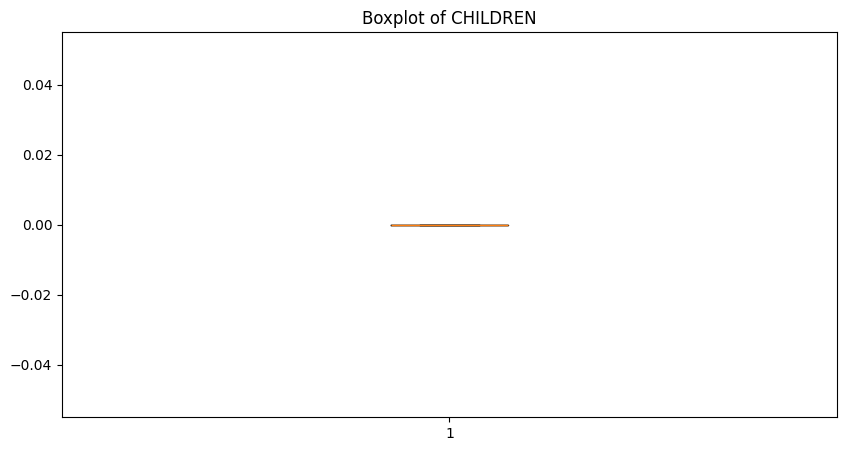

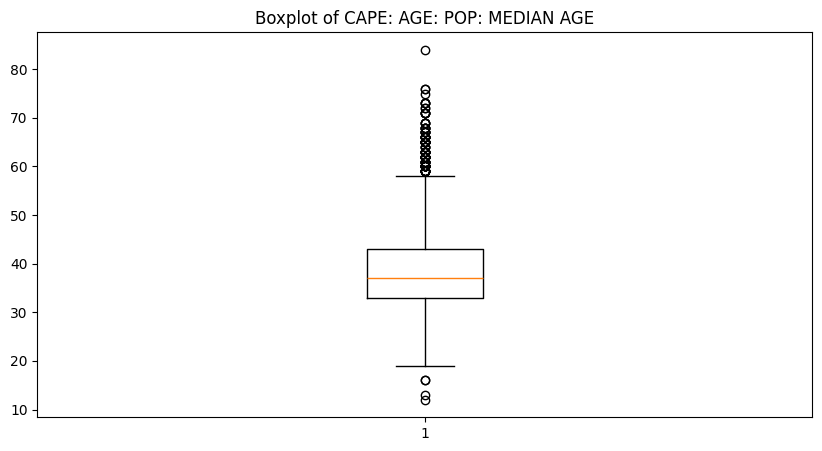

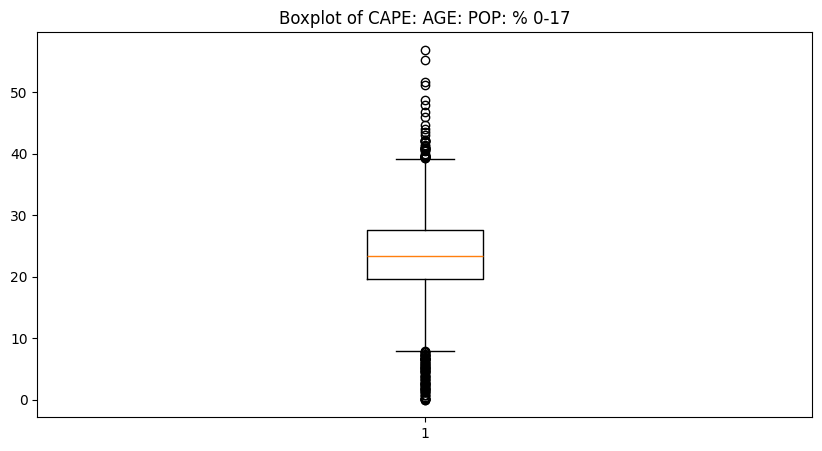

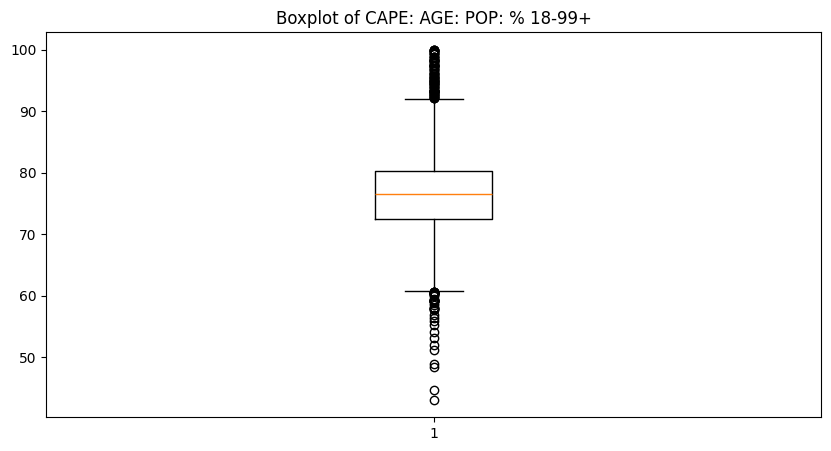

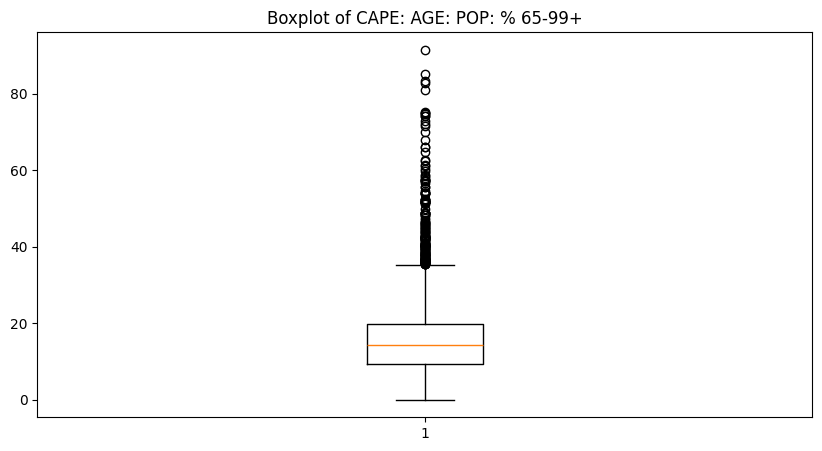

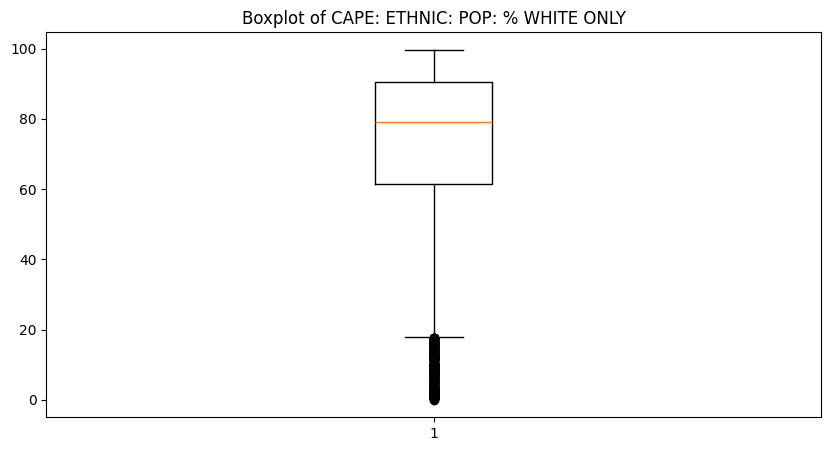

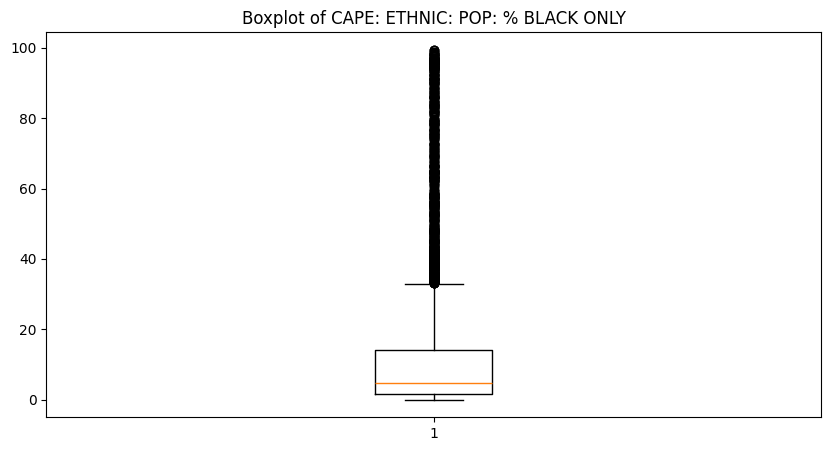

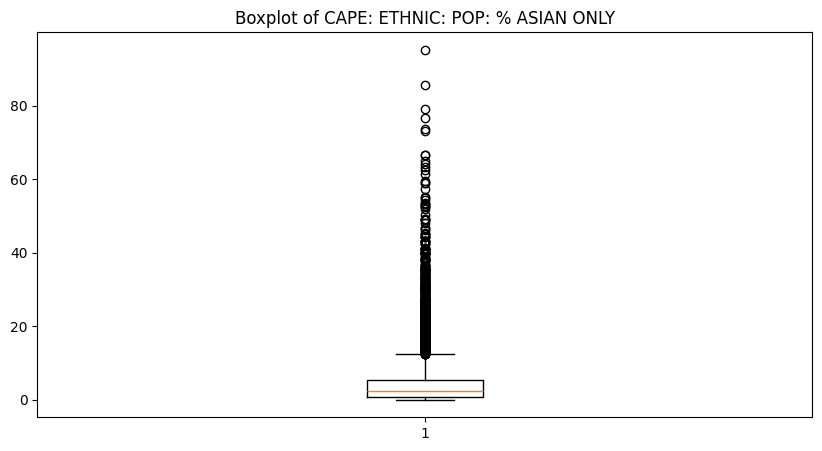

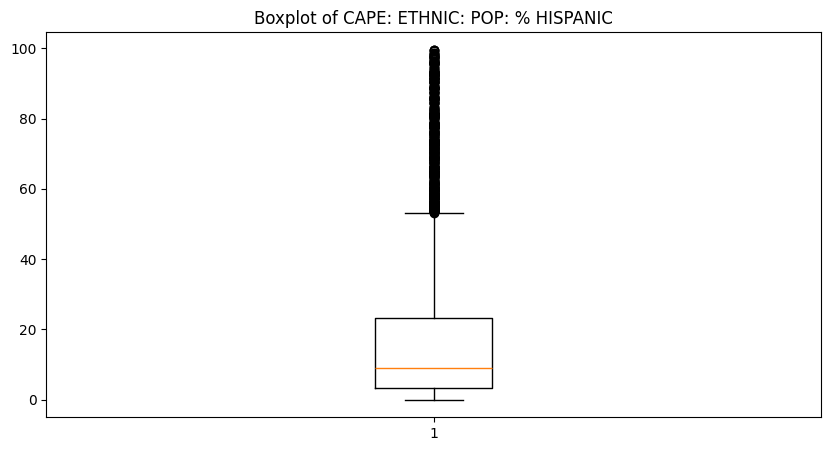

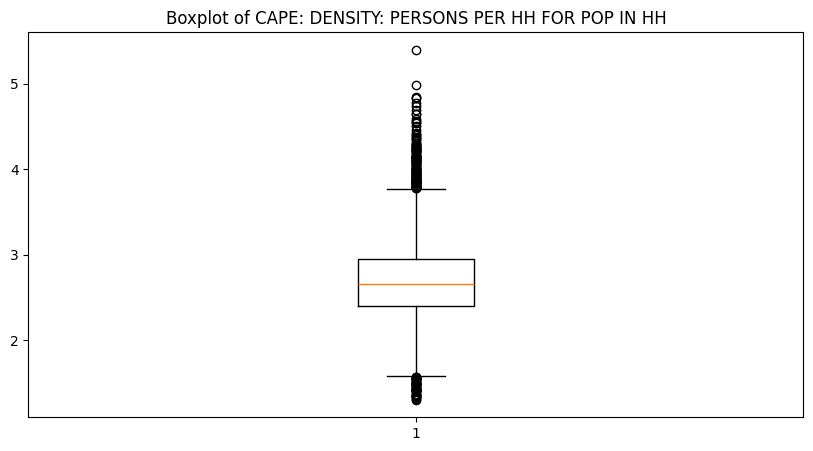

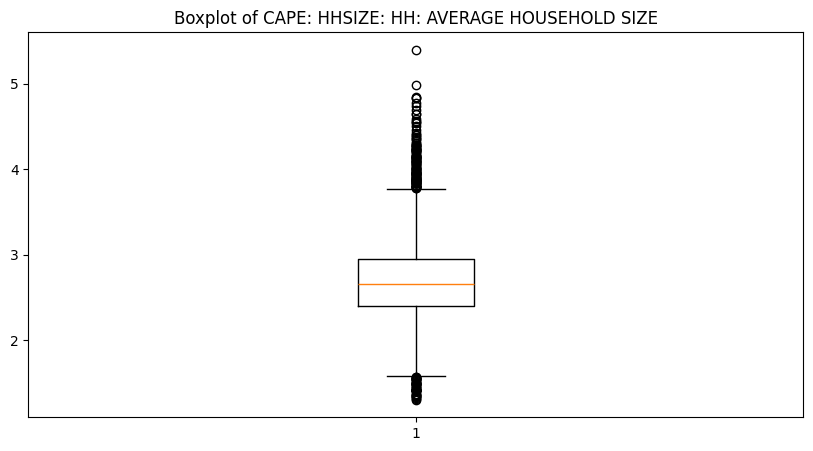

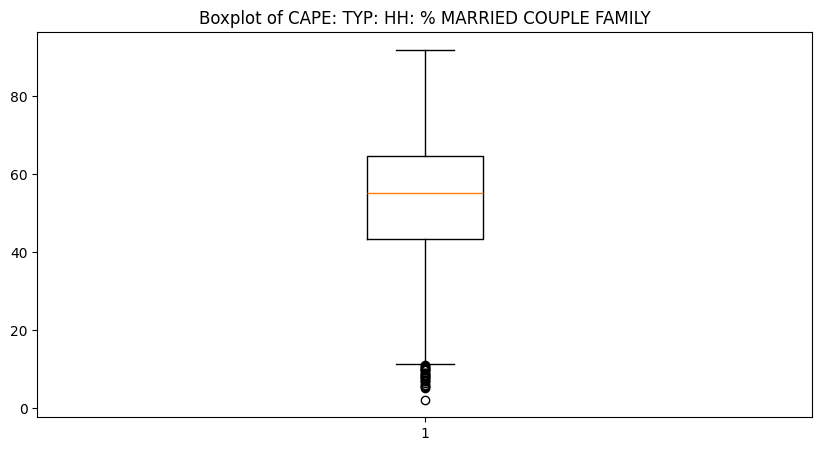

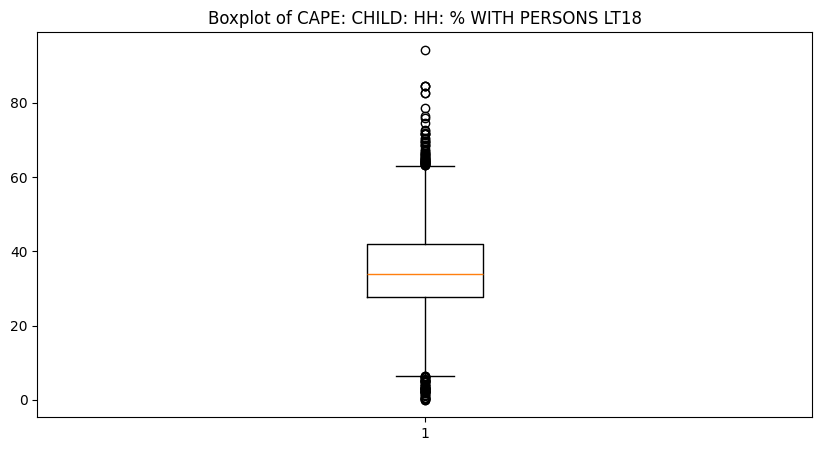

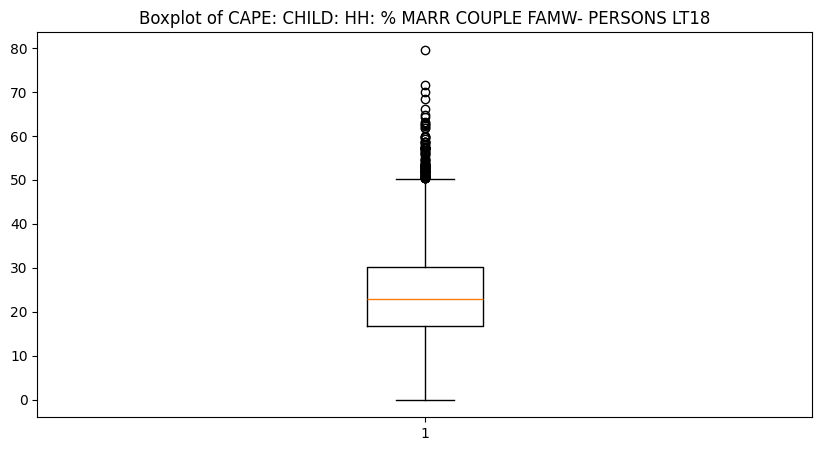

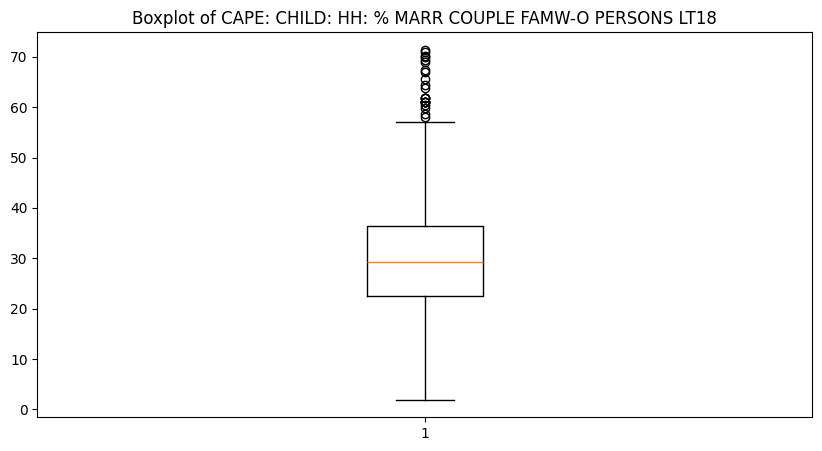

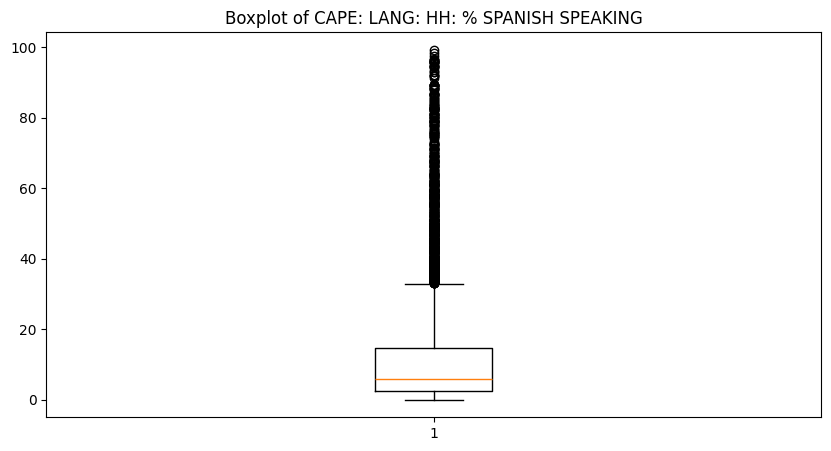

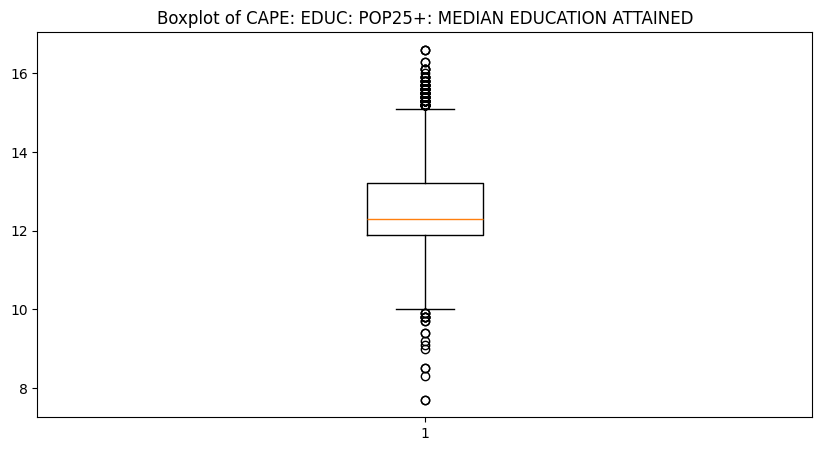

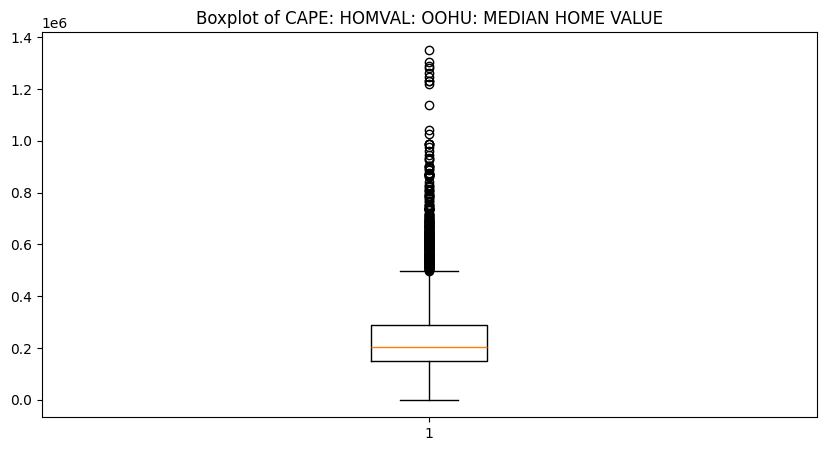

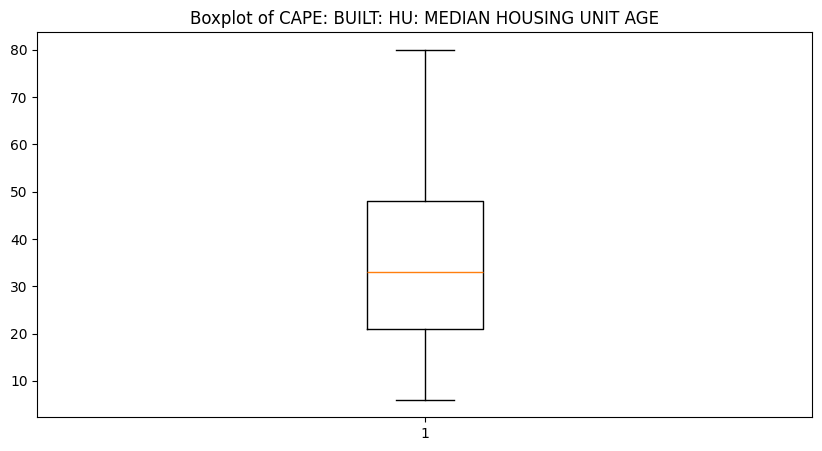

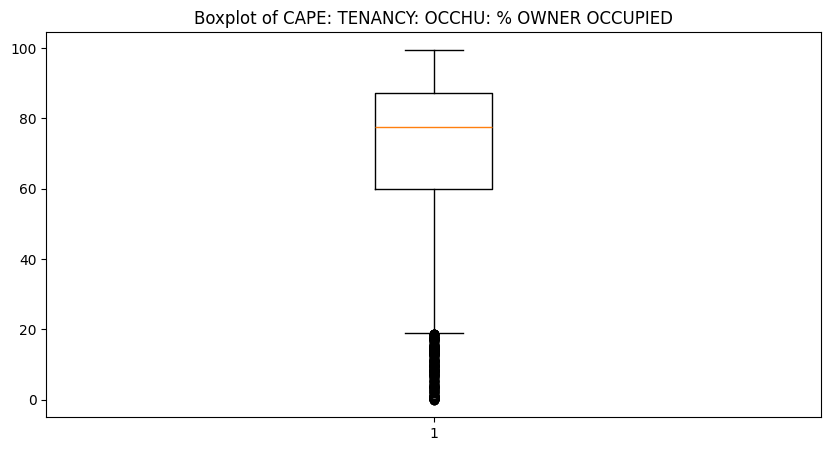

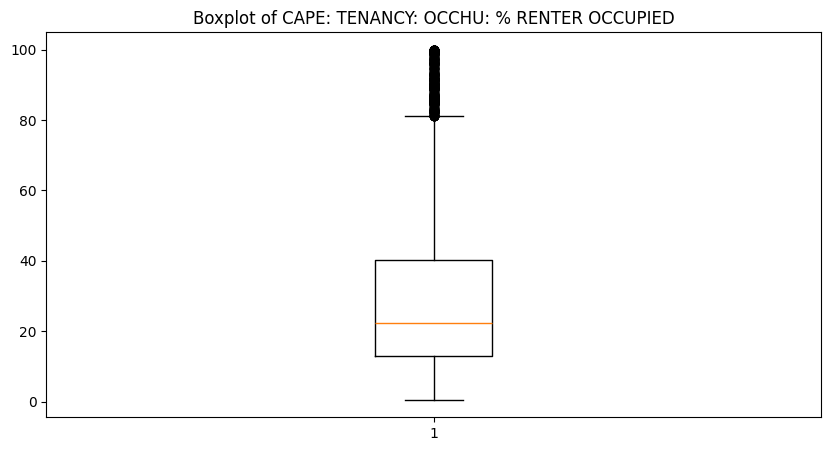

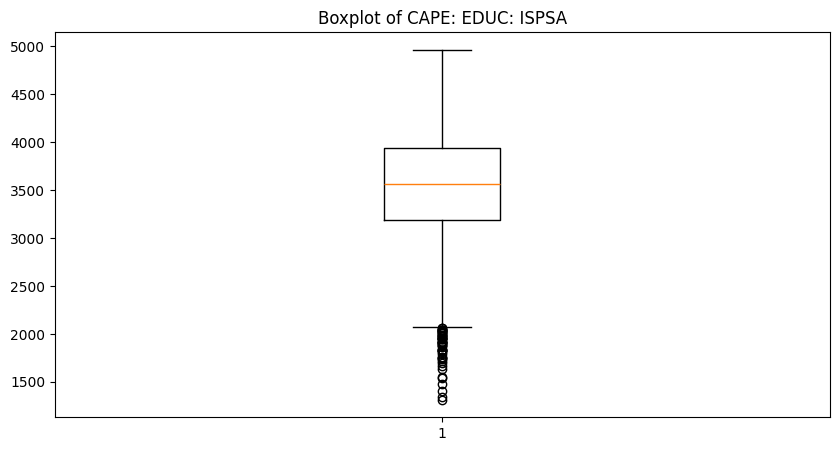

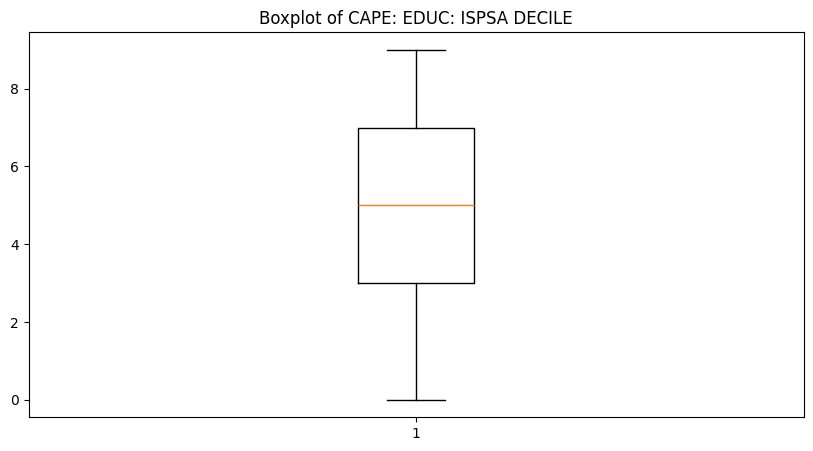

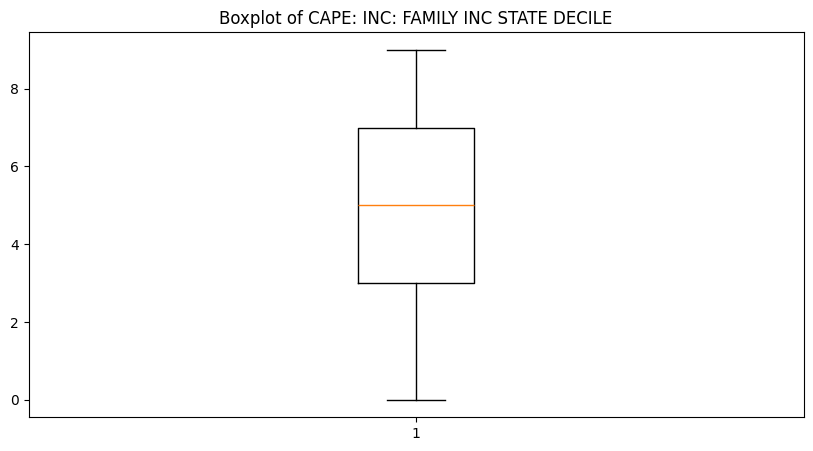

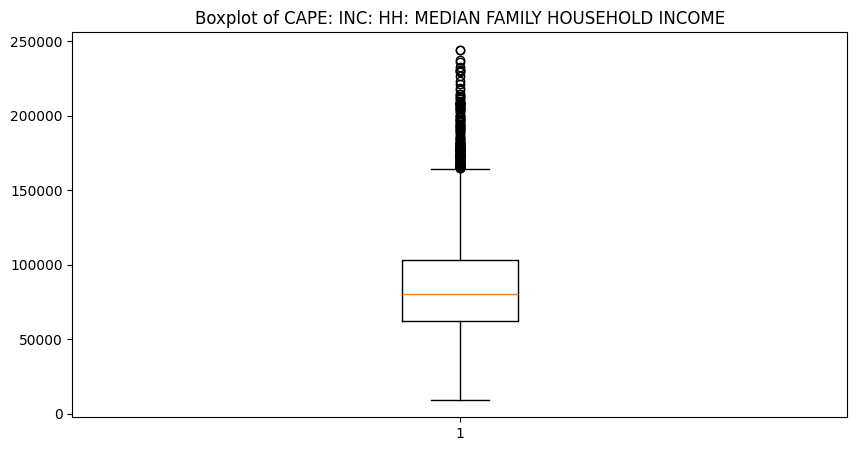

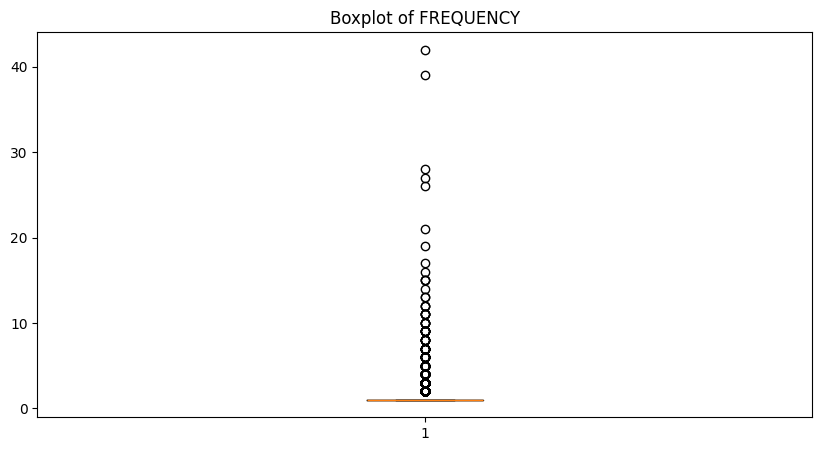

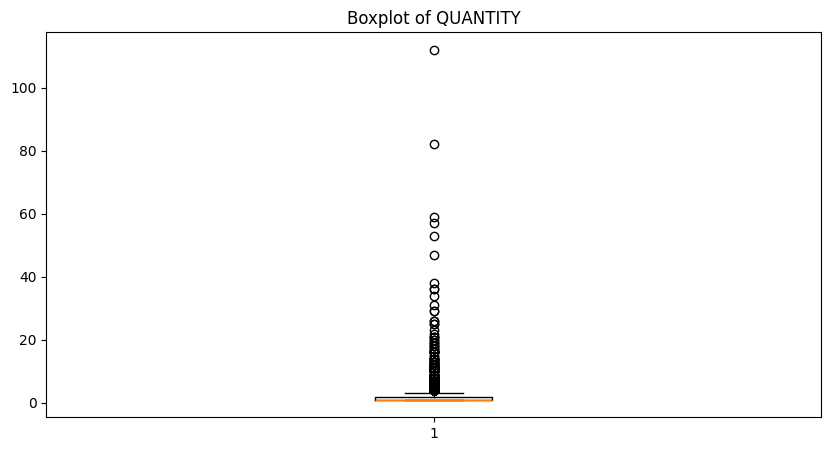

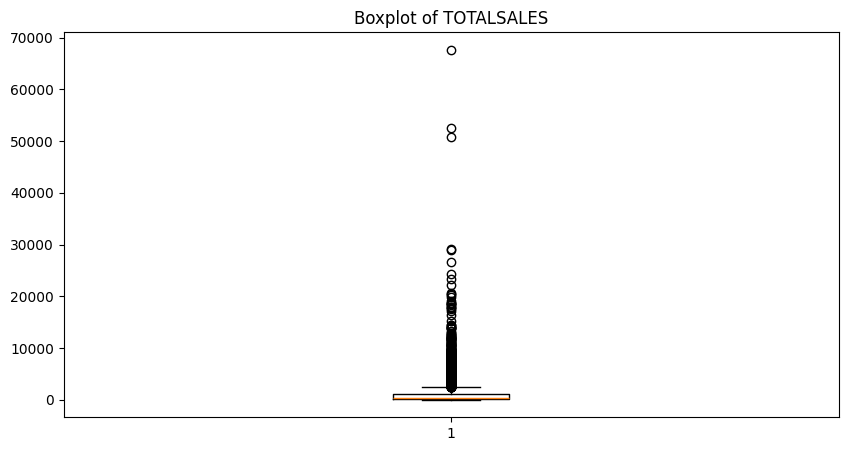

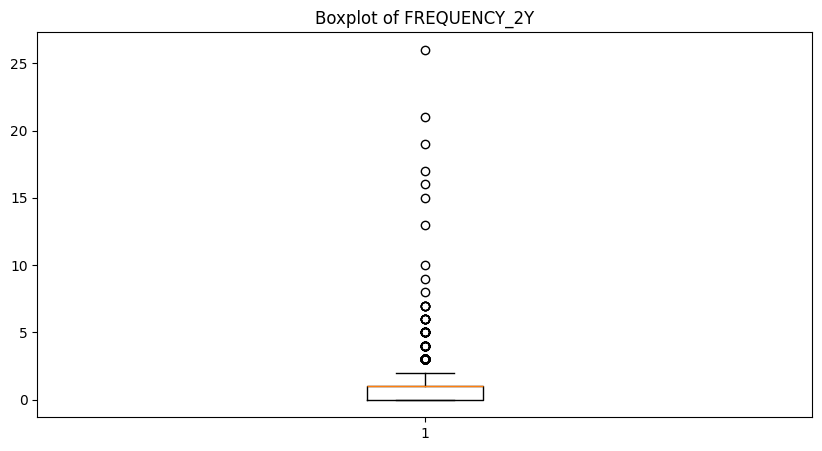

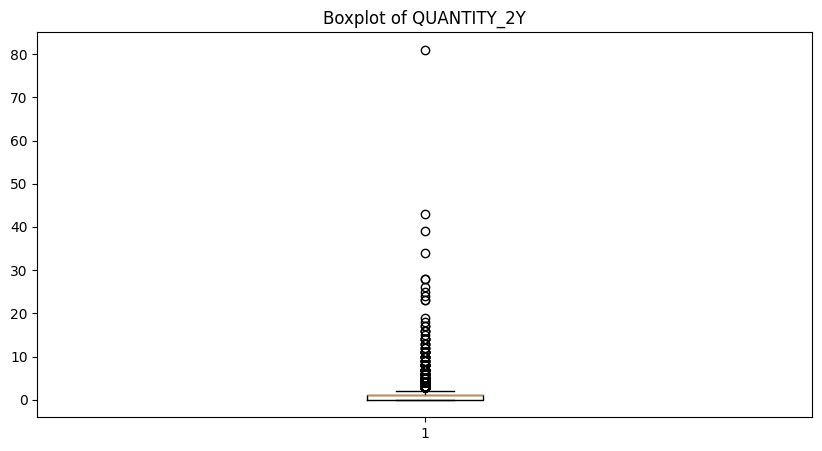

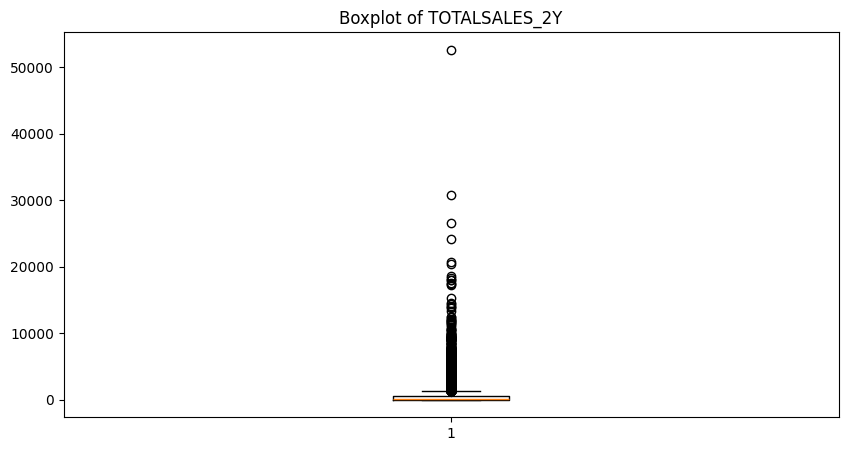

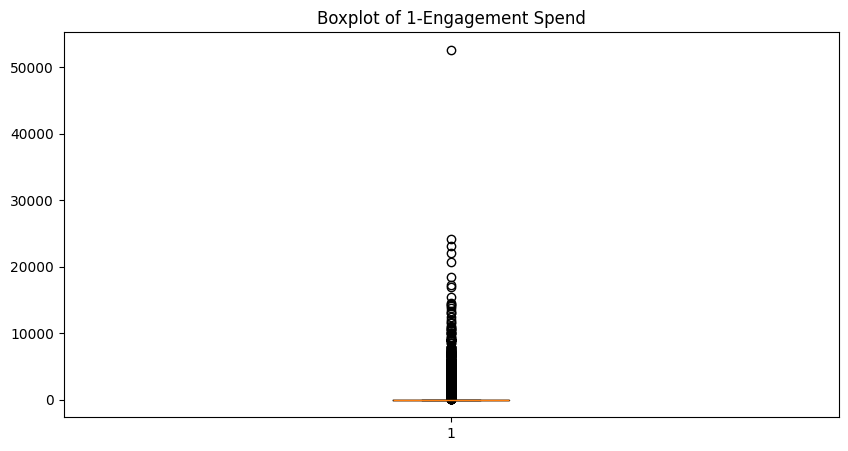

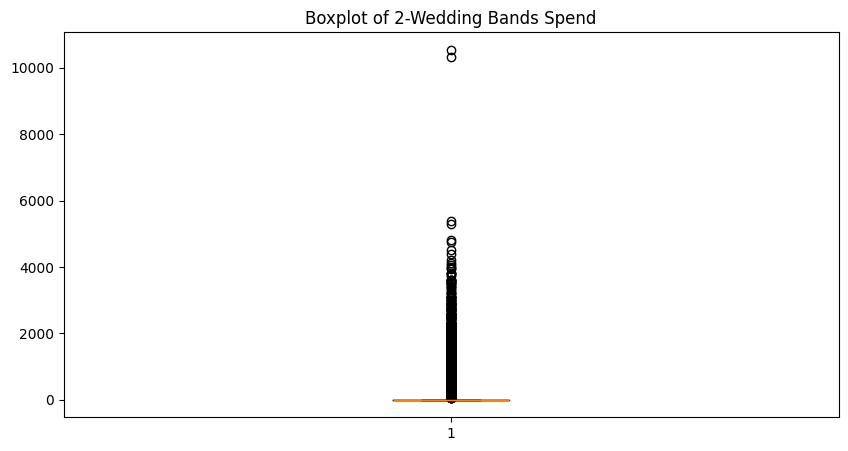

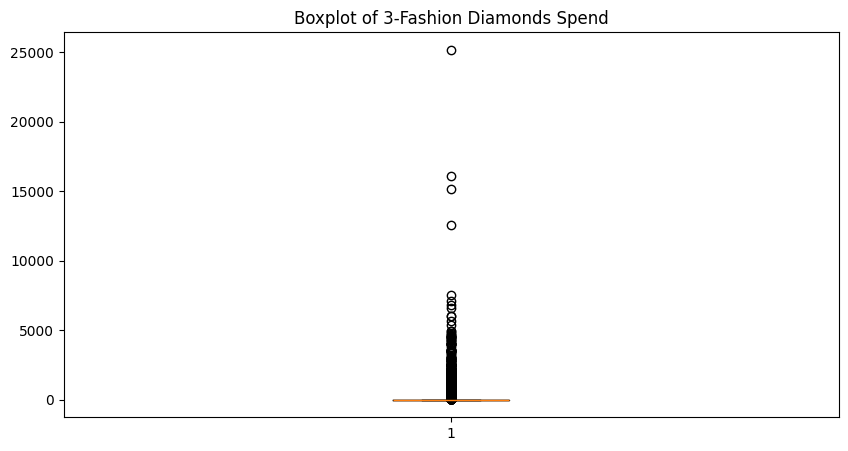

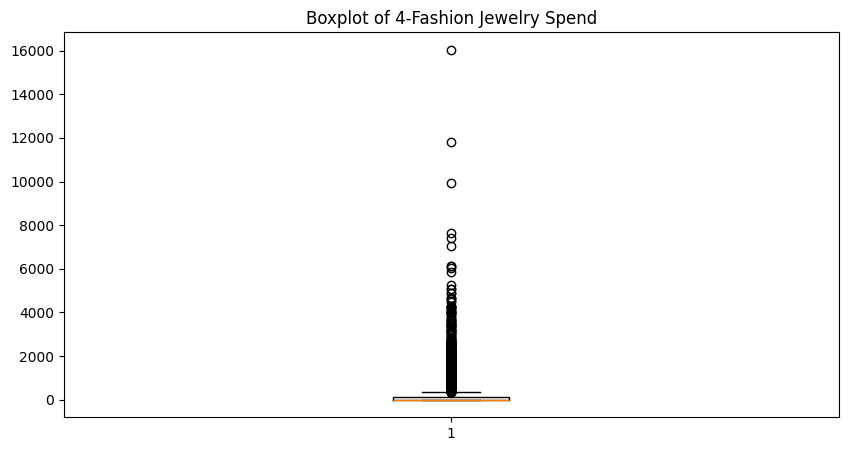

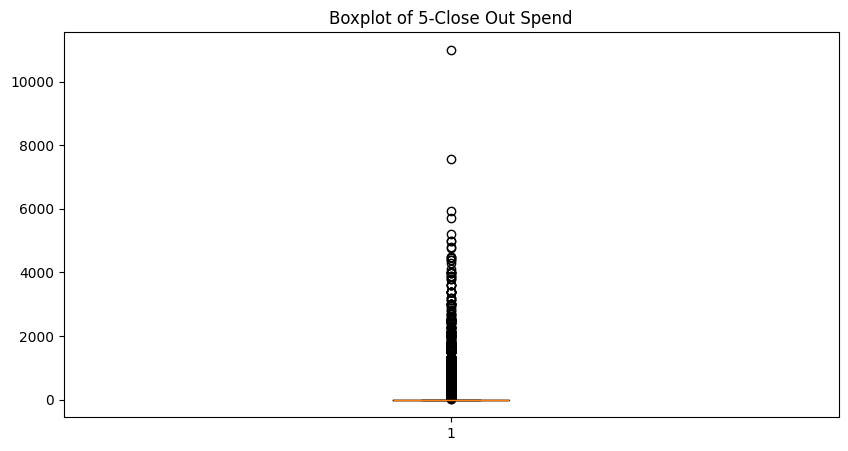

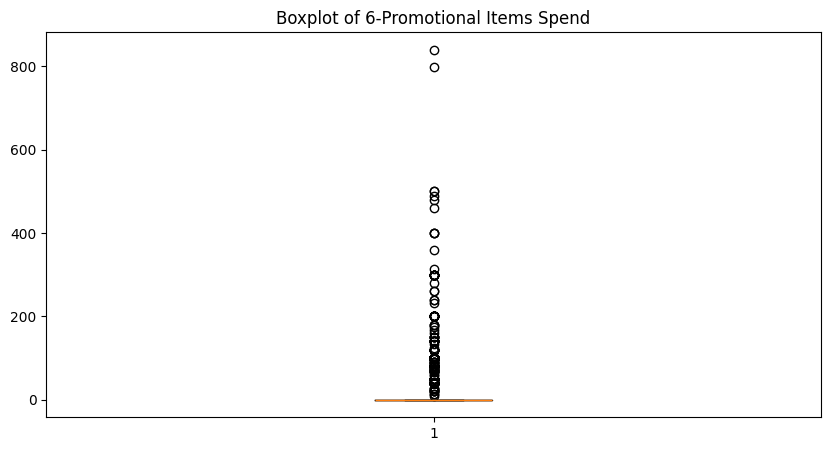

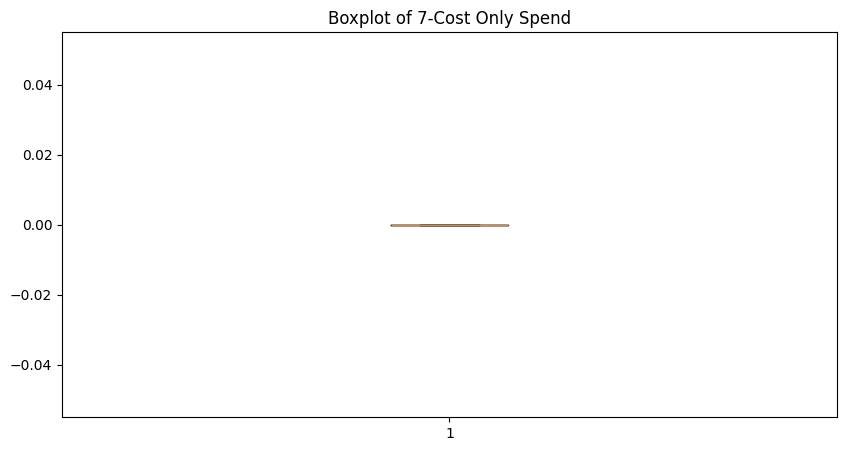

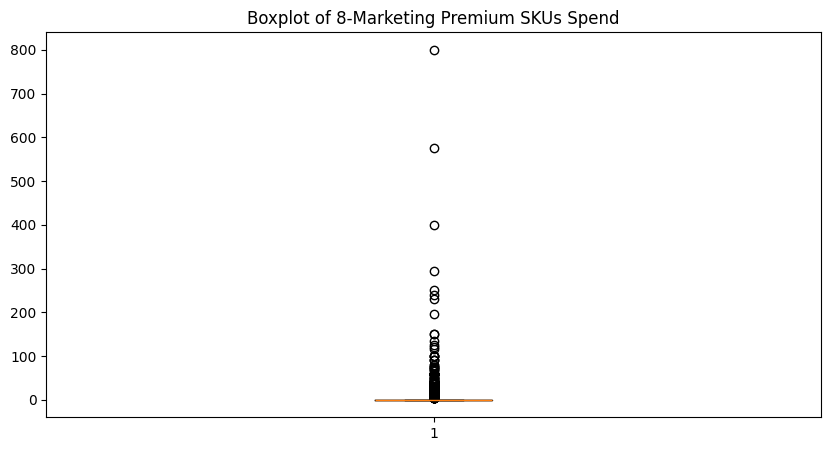

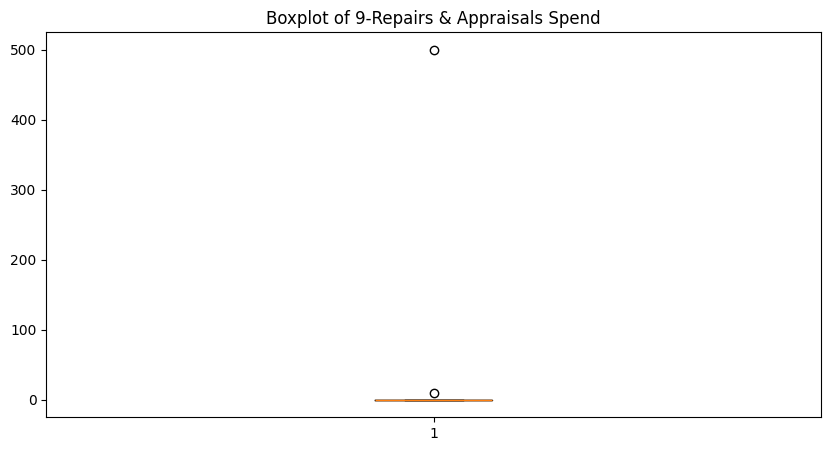

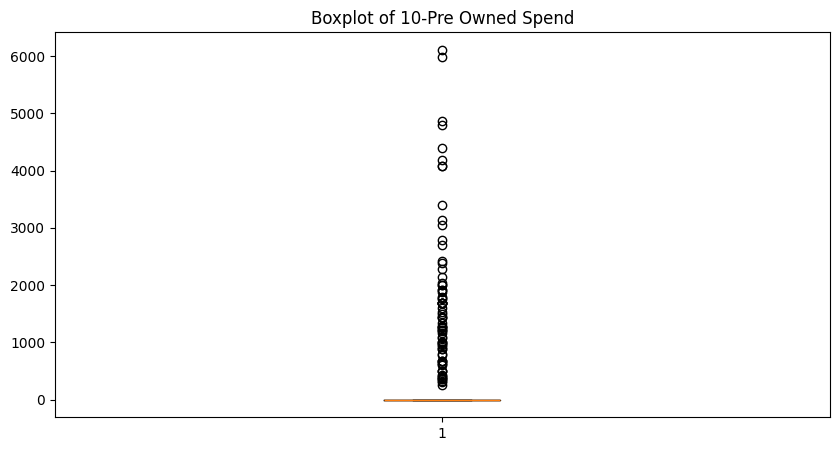

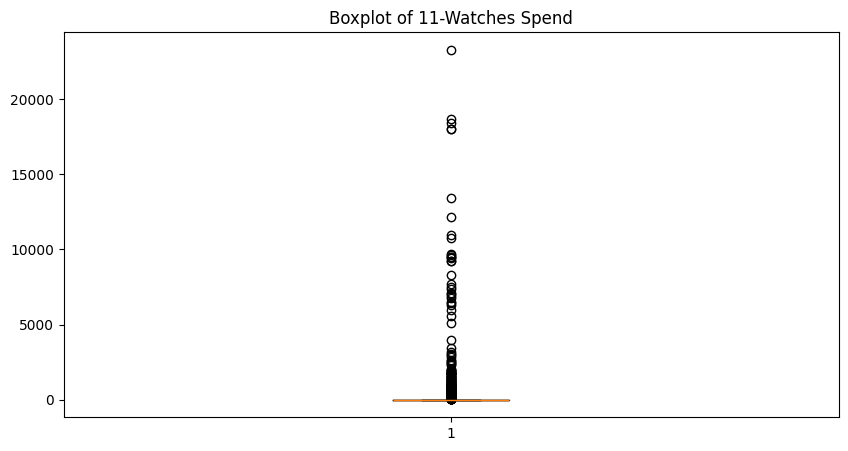

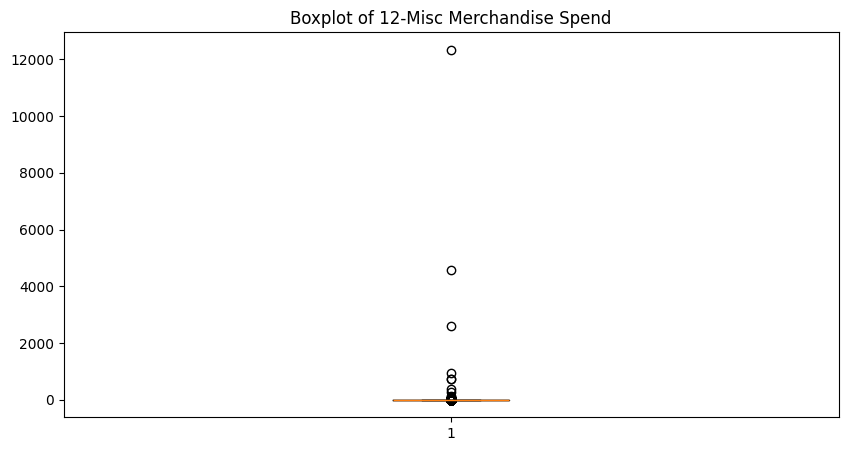

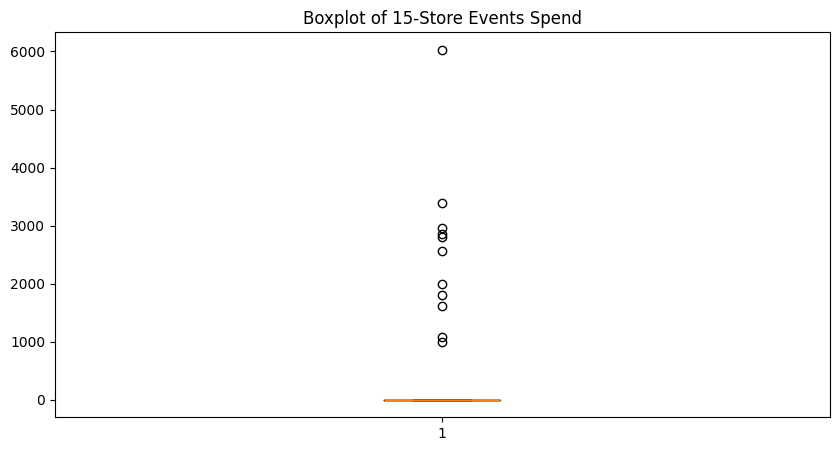

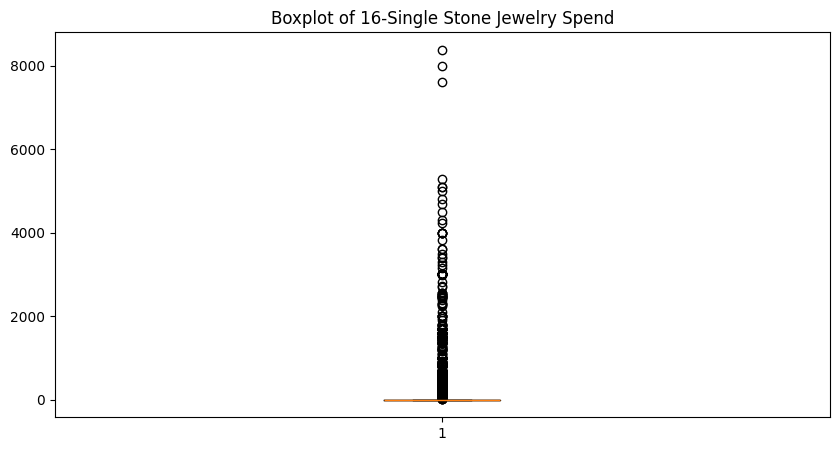

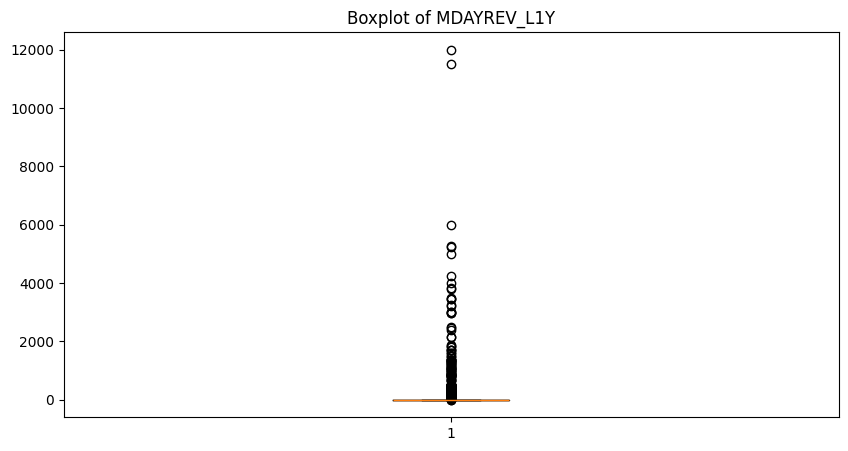

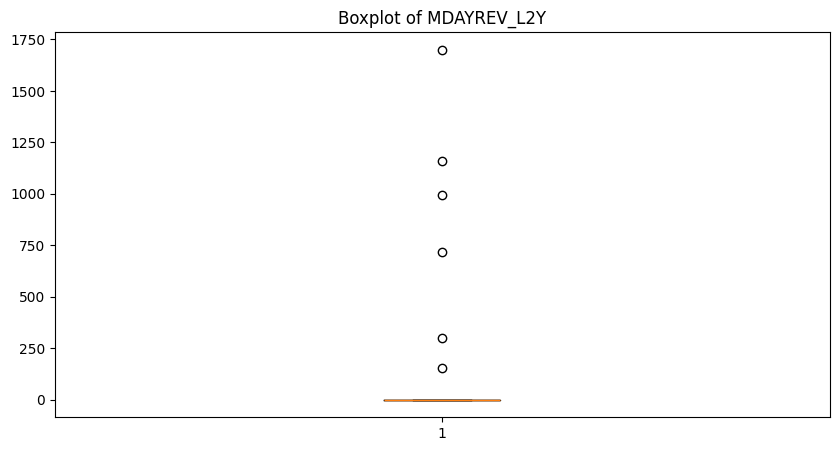

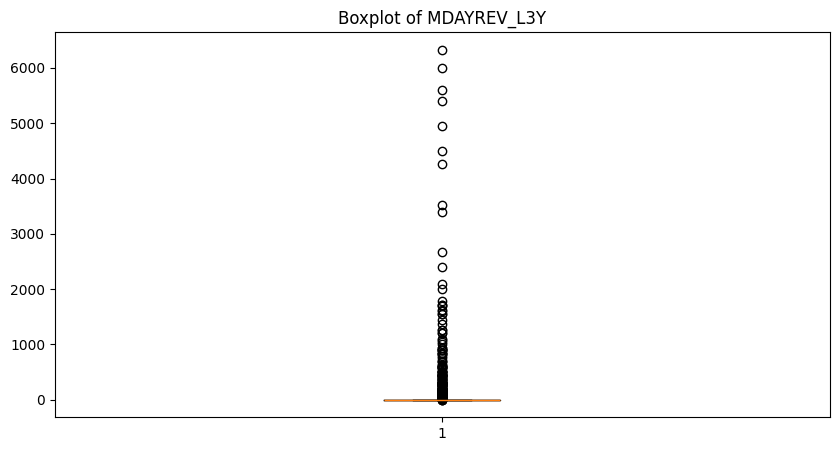

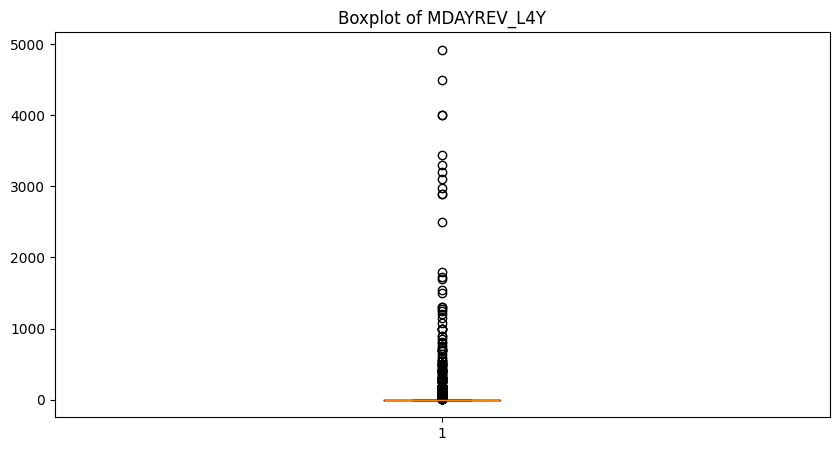

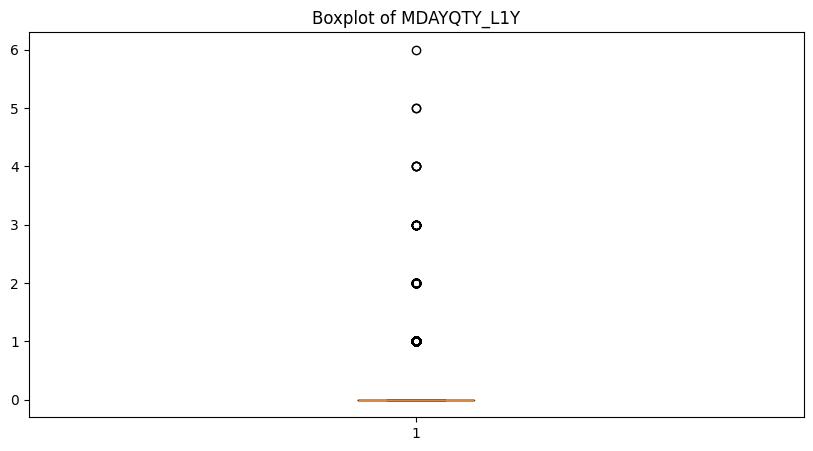

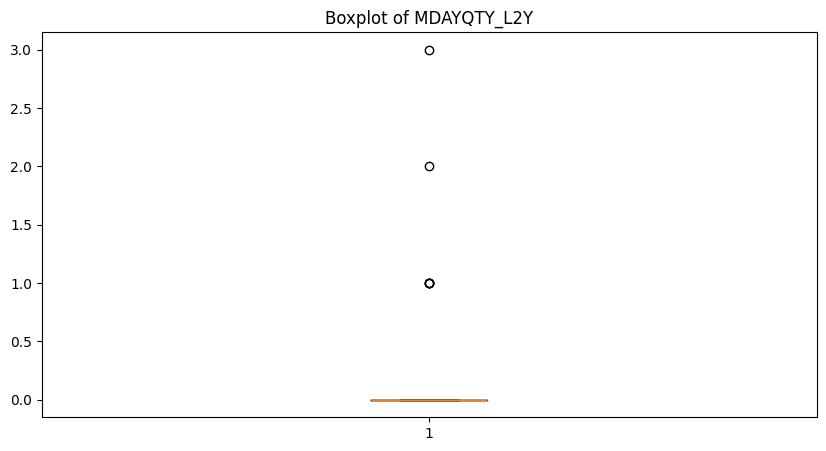

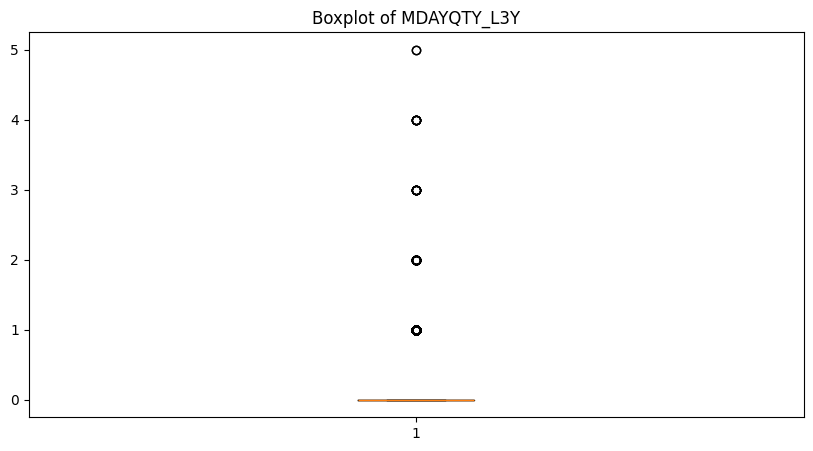

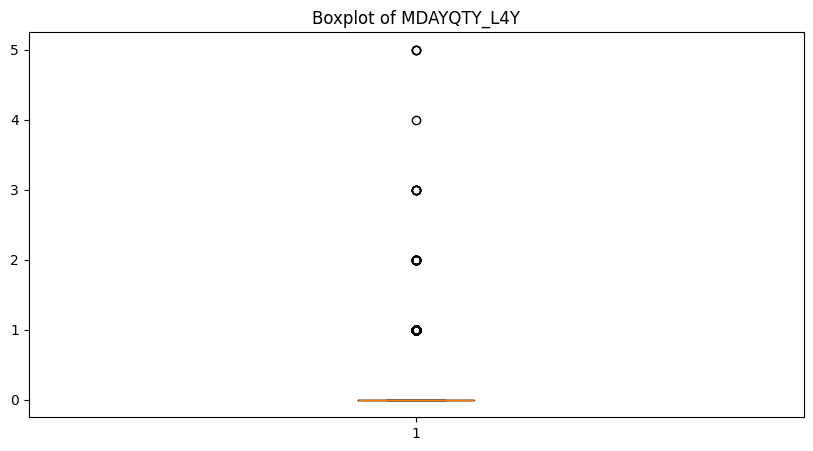

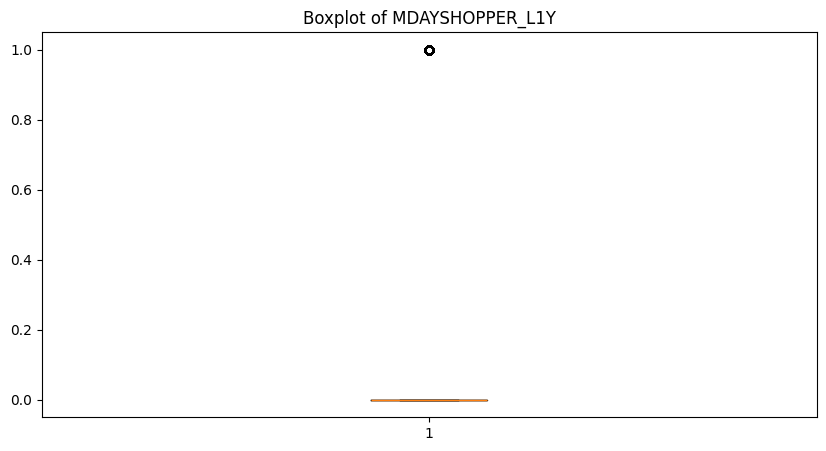

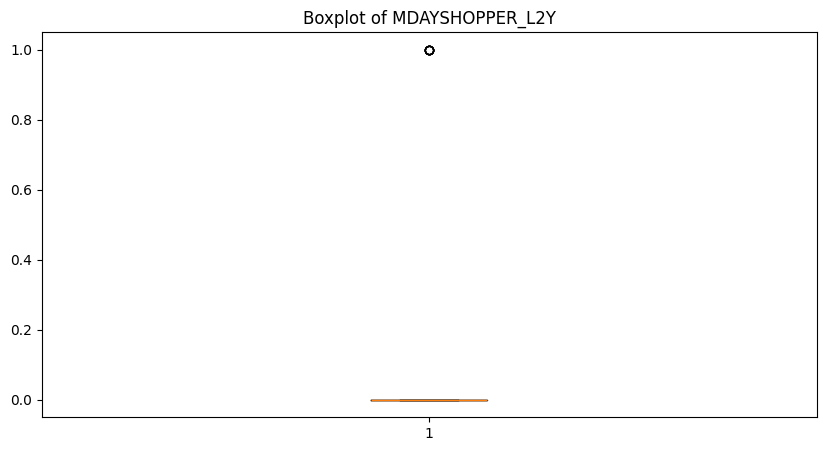

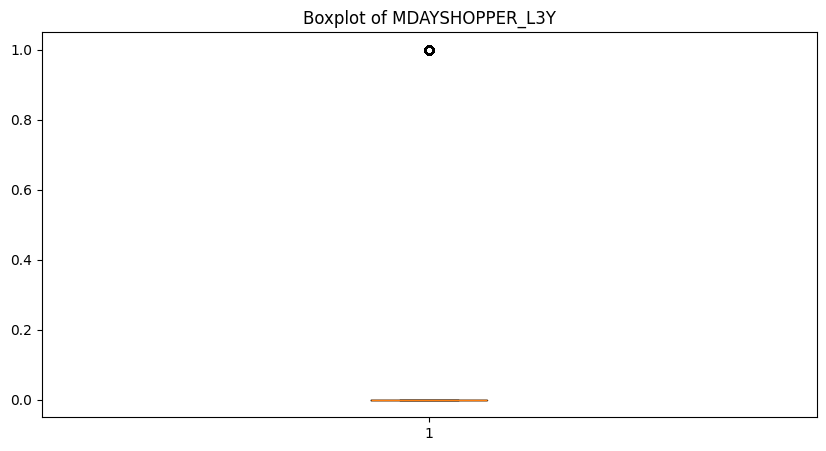

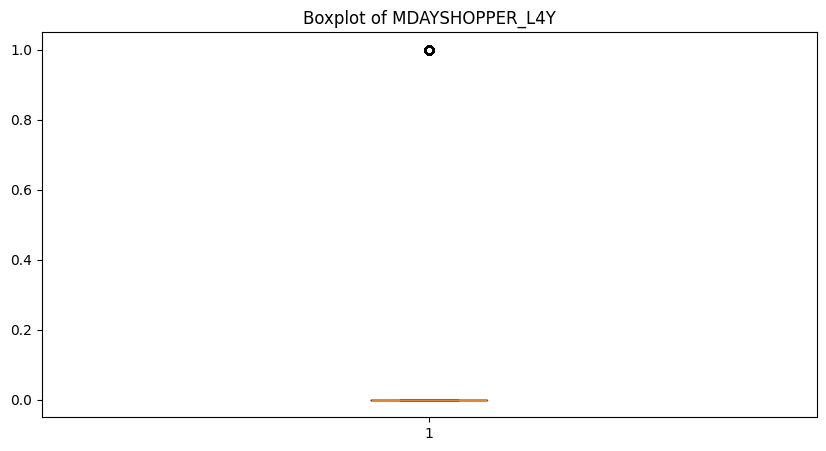

In [8]:
import matplotlib.pyplot as plt


for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data_cleaned[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.show()


**Plot distribution for 6 columns**

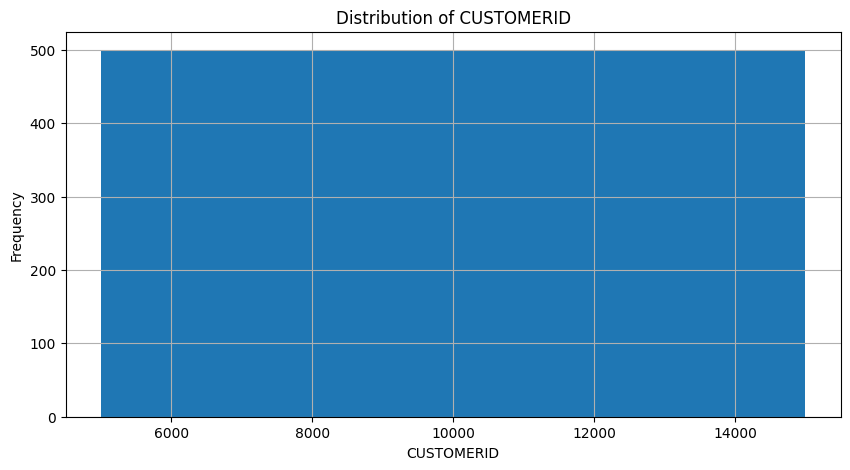

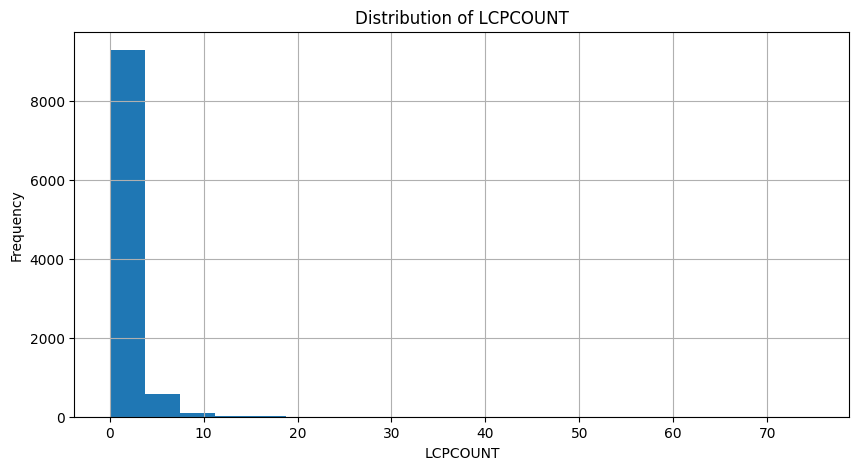

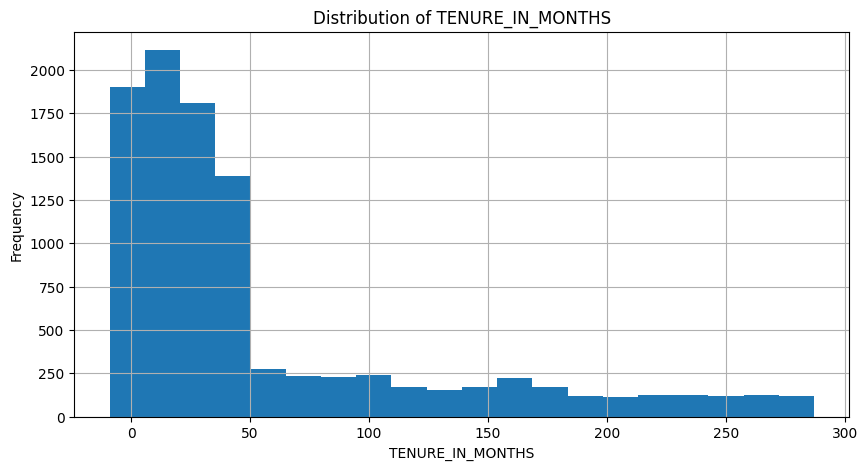

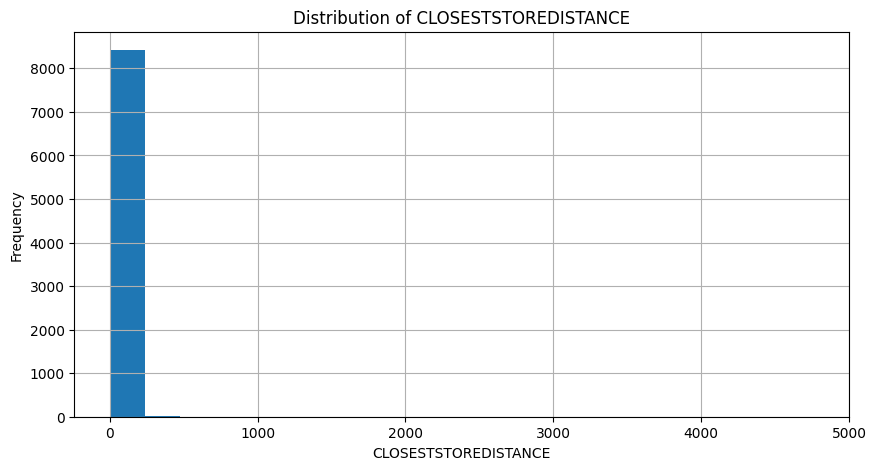

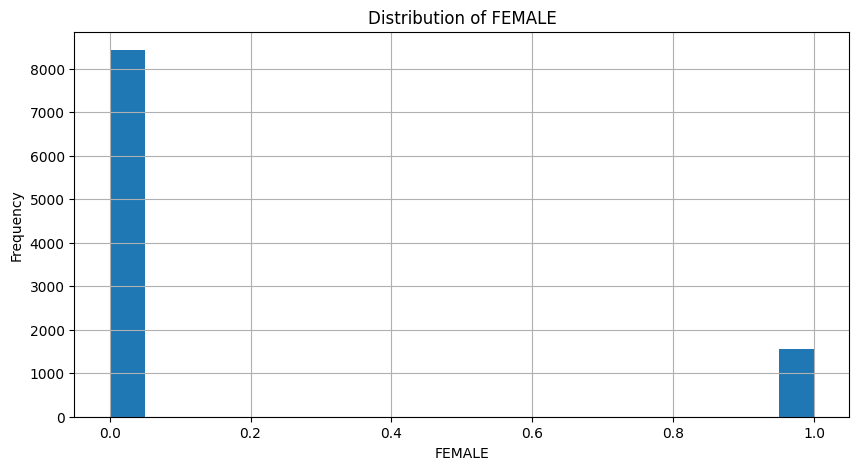

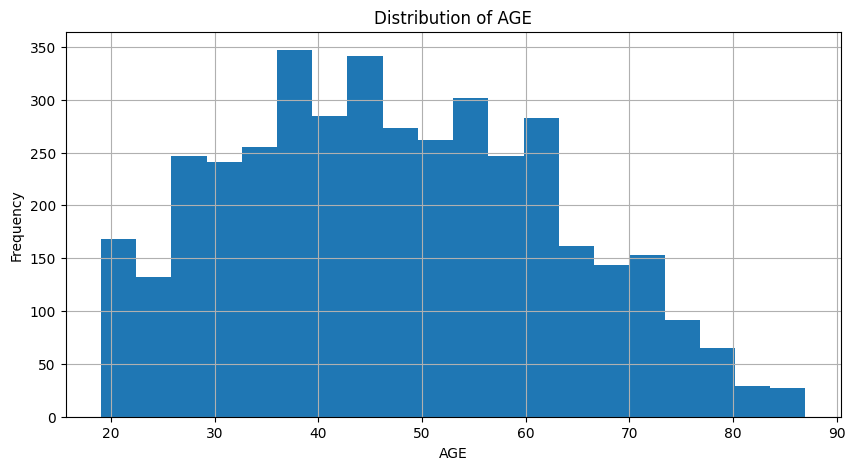

In [9]:
columns_to_plot = numeric_columns[:6]
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    data_cleaned[col].dropna().hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [10]:
!pip install fpdf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 kB 5.0 MB/s eta 0:00:00


In [11]:
from fpdf import FPDF

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add text
pdf.cell(200, 10, txt="Data Analysis Report", ln=True, align='C')
pdf.ln(10)

# Add sections
pdf.cell(200, 10, txt="1. Columns with Missing Values", ln=True, align='L')
for col, count in missing_columns.items():
    pdf.cell(200, 10, txt=f"{col}: {count} missing values", ln=True, align='L')

# Save the PDF
pdf.output("data_analysis_report.pdf")


<ipython-input-11-0617c670f2d3>:6: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
<ipython-input-11-0617c670f2d3>:9: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Data Analysis Report", ln=True, align='C')
<ipython-input-11-0617c670f2d3>:9: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Data Analysis Report", ln=True, align='C')
<ipython-input-11-0617c670f2d3>:13: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="1. Columns with Missing Values", ln=True, align='L')
<ipython-input-11-0617c670f2d3>:13: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="1. Columns with Mi

In [12]:
from google.colab import files
files.download("data_analysis_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
